In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd
import math

In [7]:
data = pd.read_csv('../1.data-preparation/new-data/data_Y1.csv')
data.describe()

,MemberID,ClaimsTruncated,TARGET,trainset,age_05,age_15,age_25,age_35,age_45,age_55,...,drugCount_max,drugCount_min,drugCount_ave,drugcount_months,labCount_max,labCount_min,labCount_ave,labcount_months,labNull,drugNull
count,7.603700e+04,76037.000000,76037.000000,76037.0,76037.000000,76037.000000,76037.000000,76037.000000,76037.000000,76037.000000,...,76037.000000,76037.000000,76037.000000,76037.000000,76037.000000,76037.000000,76037.000000,76037.000000,76037.000000,76037.000000
mean,4.994795e+07,0.052225,0.467102,1.0,0.085866,0.090824,0.059405,0.096098,0.132935,0.112366,...,2.175033,0.968765,1.511600,3.703697,3.758749,2.178216,2.885066,1.580296,0.299999,0.344569
std,2.890149e+07,0.222481,1.612204,0.0,0.280168,0.287361,0.236383,0.294727,0.339507,0.315819,...,2.243436,1.046544,1.536634,4.089940,3.434990,2.533432,2.696510,1.814171,0.458260,0.475231
min,2.100000e+02,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.483922e+07,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.990758e+07,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,1.200000,2.000000,3.000000,1.000000,2.600000,1.000000,0.000000,0.000000
75%,7.510115e+07,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.285714,7.000000,6.000000,3.000000,4.800000,2.000000,1.000000,1.000000
max,9.999863e+07,1.000000,15.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,12.000000,10.000000,10.000000,10.000000,12.000000,1.000000,1.000000


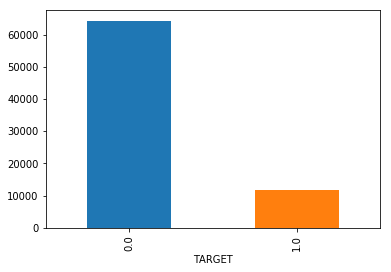

In [10]:
data.loc[data['TARGET'] > 0, 'TARGET'] = 1
data.groupby(['TARGET']).size().plot.bar()

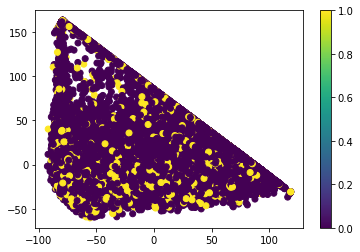

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from MulticoreTSNE import MulticoreTSNE as TSNE

pca = PCA(n_components=2)
proj = pca.fit_transform(X)
plt.scatter(proj[:, 0], proj[:, 1], c=y)
plt.colorbar()

In [10]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
class_weights = np.array(class_weights).tolist()
d = {}

for idx,item in enumerate(class_weights):
    d[idx] = item
d


{0: 0.5924684981521884, 1: 3.2036234501023233}

In [11]:
data.drop("MemberID", axis = 1, inplace = True)
data.drop("Year", axis = 1, inplace = True)

y = data['TARGET']
X = data.loc[:, data.columns != 'TARGET']
X.head()

KeyError: "labels ['MemberID'] not contained in axis"

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [12]:
def eval(model, X_test, y_test):
    pred_y = model.predict(X_test) # your predicted y values
    pred_y = pred_y.astype(int)
    # The root mean square logarithmic error
    msle = np.mean( (np.log(pred_y + 1) - np.log(y_test + 1)) ** 2)
    rmsle = math.sqrt(msle)
    print ("RMSLE: %.4f" % rmsle)
    from sklearn.metrics import r2_score
    r2 = r2_score(pred_y, y_test)
    print ("R2 value: %.4f" % r2)
    from sklearn.metrics import f1_score
    f1= f1_score(y_true=y_test, y_pred=pred_y)
    print ("F1 score: %.4f" % f1)

In [9]:
model= ensemble.GradientBoostingClassifier(verbose =1)
model.fit(X_train, y_train)
eval(model, X_test, y_test)

      Iter       Train Loss   Remaining Time 
         1           0.8548           49.87s
         2           0.8458           48.25s
         3           0.8388           47.33s
         4           0.8328           46.46s
         5           0.8274           45.91s
         6           0.8232           45.34s
         7           0.8184           44.67s
         8           0.8152           44.24s
         9           0.8122           44.21s
        10           0.8094           43.53s
        20           0.7915           37.96s
        30           0.7831           32.53s
        40           0.7780           27.73s
        50           0.7741           24.00s
        60           0.7710           19.23s
        70           0.7690           14.52s
        80           0.7666            9.69s
        90           0.7647            4.90s
       100           0.7633            0.00s
RMSLE: 0.2680
R2 value: -7.8957
F1 score: 0.1147


In [13]:
model= ensemble.RandomForestClassifier(class_weight=d,verbose =1)
model.fit(X_train, y_train)
eval(model, X_test, y_test)

RMSLE: 0.2740
R2 value: -6.5538
F1 score: 0.0963


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [31]:
from sklearn import linear_model

model = linear_model.LogisticRegression(C= 0.75, penalty= 'l1', solver= 'saga',class_weight=d, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)
eval(model, X_test, y_test)

max_iter reached after 16 seconds
RMSLE: 0.3692
R2 value: -0.3225
F1 score: 0.3877


C:\Users\duy.truong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   16.3s finished


In [15]:
from sklearn import svm

model = svm.LinearSVC(class_weight=d, verbose=1)
model.fit(X_train, y_train)
eval(model, X_test, y_test)

[LibLinear]RMSLE: 0.3449
R2 value: -0.3378
F1 score: 0.3763


C:\Users\duy.truong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [23]:

model = linear_model.SGDClassifier(max_iter=5000,class_weight=d,learning_rate='optimal',n_jobs=-1, verbose=1)
model.fit(X_train, y_train)
eval(model, X_test, y_test)

-- Epoch 1
Norm: 64.74, NNZs: 139, Bias: 1.648544, T: 53225, Avg. loss: 55.619192
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 31.14, NNZs: 139, Bias: 1.146576, T: 106450, Avg. loss: 9.681309
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 23.13, NNZs: 139, Bias: 0.232682, T: 159675, Avg. loss: 6.264192
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 17.70, NNZs: 139, Bias: 1.009205, T: 212900, Avg. loss: 4.644273
Total training time: 0.11 seconds.
-- Epoch 5
Norm: 13.15, NNZs: 139, Bias: 1.301546, T: 266125, Avg. loss: 3.647796
Total training time: 0.14 seconds.
-- Epoch 6
Norm: 15.36, NNZs: 139, Bias: -0.324636, T: 319350, Avg. loss: 3.086344
Total training time: 0.17 seconds.
-- Epoch 7
Norm: 12.19, NNZs: 139, Bias: 0.223442, T: 372575, Avg. loss: 2.856011
Total training time: 0.19 seconds.
-- Epoch 8
Norm: 9.48, NNZs: 139, Bias: 0.616856, T: 425800, Avg. loss: 2.598538
Total training time: 0.22 seconds.
-- Epoch 9
Norm: 5.52, NNZs: 139, Bias: -0.186948, T: 479025, Av

-- Epoch 71
Norm: 1.55, NNZs: 139, Bias: -0.270721, T: 3778975, Avg. loss: 0.850729
Total training time: 2.13 seconds.
-- Epoch 72
Norm: 1.69, NNZs: 139, Bias: -0.118927, T: 3832200, Avg. loss: 0.865881
Total training time: 2.16 seconds.
-- Epoch 73
Norm: 1.65, NNZs: 139, Bias: -0.169137, T: 3885425, Avg. loss: 0.863542
Total training time: 2.19 seconds.
-- Epoch 74
Norm: 1.62, NNZs: 139, Bias: -0.151843, T: 3938650, Avg. loss: 0.850150
Total training time: 2.22 seconds.
-- Epoch 75
Norm: 1.50, NNZs: 139, Bias: -0.290431, T: 3991875, Avg. loss: 0.848684
Total training time: 2.25 seconds.
-- Epoch 76
Norm: 1.68, NNZs: 139, Bias: -0.299067, T: 4045100, Avg. loss: 0.852765
Total training time: 2.28 seconds.
-- Epoch 77
Norm: 1.50, NNZs: 139, Bias: -0.313275, T: 4098325, Avg. loss: 0.844858
Total training time: 2.31 seconds.
-- Epoch 78
Norm: 1.54, NNZs: 139, Bias: -0.178477, T: 4151550, Avg. loss: 0.843808
Total training time: 2.34 seconds.
-- Epoch 79
Norm: 1.48, NNZs: 139, Bias: -0.2300

Norm: 1.23, NNZs: 139, Bias: -0.223991, T: 7557950, Avg. loss: 0.760410
Total training time: 4.29 seconds.
-- Epoch 143
Norm: 1.14, NNZs: 139, Bias: -0.260658, T: 7611175, Avg. loss: 0.763696
Total training time: 4.31 seconds.
-- Epoch 144
Norm: 1.19, NNZs: 139, Bias: -0.248242, T: 7664400, Avg. loss: 0.767143
Total training time: 4.34 seconds.
-- Epoch 145
Norm: 1.22, NNZs: 139, Bias: -0.242194, T: 7717625, Avg. loss: 0.758735
Total training time: 4.37 seconds.
-- Epoch 146
Norm: 1.13, NNZs: 139, Bias: -0.243626, T: 7770850, Avg. loss: 0.755393
Total training time: 4.40 seconds.
-- Epoch 147
Norm: 1.17, NNZs: 139, Bias: -0.244720, T: 7824075, Avg. loss: 0.756368
Total training time: 4.44 seconds.
-- Epoch 148
Norm: 1.08, NNZs: 139, Bias: -0.232595, T: 7877300, Avg. loss: 0.759591
Total training time: 4.47 seconds.
-- Epoch 149
Norm: 1.10, NNZs: 139, Bias: -0.287324, T: 7930525, Avg. loss: 0.762555
Total training time: 4.50 seconds.
-- Epoch 150
Norm: 1.10, NNZs: 139, Bias: -0.292102, 

-- Epoch 211
Norm: 1.01, NNZs: 139, Bias: -0.274092, T: 11230475, Avg. loss: 0.728460
Total training time: 6.45 seconds.
-- Epoch 212
Norm: 1.06, NNZs: 139, Bias: -0.223232, T: 11283700, Avg. loss: 0.725506
Total training time: 6.47 seconds.
-- Epoch 213
Norm: 1.07, NNZs: 139, Bias: -0.271520, T: 11336925, Avg. loss: 0.729052
Total training time: 6.50 seconds.
-- Epoch 214
Norm: 1.05, NNZs: 139, Bias: -0.237744, T: 11390150, Avg. loss: 0.726838
Total training time: 6.53 seconds.
-- Epoch 215
Norm: 1.05, NNZs: 139, Bias: -0.290842, T: 11443375, Avg. loss: 0.722801
Total training time: 6.55 seconds.
-- Epoch 216
Norm: 1.05, NNZs: 139, Bias: -0.310811, T: 11496600, Avg. loss: 0.723723
Total training time: 6.58 seconds.
-- Epoch 217
Norm: 1.06, NNZs: 139, Bias: -0.305449, T: 11549825, Avg. loss: 0.725854
Total training time: 6.61 seconds.
-- Epoch 218
Norm: 1.09, NNZs: 139, Bias: -0.283212, T: 11603050, Avg. loss: 0.724986
Total training time: 6.63 seconds.
-- Epoch 219
Norm: 1.08, NNZs: 1

Norm: 1.01, NNZs: 139, Bias: -0.245701, T: 15009450, Avg. loss: 0.706622
Total training time: 8.43 seconds.
-- Epoch 283
Norm: 1.00, NNZs: 139, Bias: -0.195731, T: 15062675, Avg. loss: 0.704241
Total training time: 8.46 seconds.
-- Epoch 284
Norm: 0.99, NNZs: 139, Bias: -0.314661, T: 15115900, Avg. loss: 0.714004
Total training time: 8.49 seconds.
-- Epoch 285
Norm: 1.06, NNZs: 139, Bias: -0.297756, T: 15169125, Avg. loss: 0.705557
Total training time: 8.52 seconds.
-- Epoch 286
Norm: 1.02, NNZs: 139, Bias: -0.285616, T: 15222350, Avg. loss: 0.702028
Total training time: 8.55 seconds.
-- Epoch 287
Norm: 0.99, NNZs: 139, Bias: -0.252269, T: 15275575, Avg. loss: 0.700381
Total training time: 8.57 seconds.
-- Epoch 288
Norm: 1.02, NNZs: 139, Bias: -0.265072, T: 15328800, Avg. loss: 0.708358
Total training time: 8.60 seconds.
-- Epoch 289
Norm: 1.05, NNZs: 139, Bias: -0.271815, T: 15382025, Avg. loss: 0.708438
Total training time: 8.63 seconds.
-- Epoch 290
Norm: 1.05, NNZs: 139, Bias: -0.

Norm: 1.00, NNZs: 139, Bias: -0.293187, T: 18735200, Avg. loss: 0.691747
Total training time: 10.42 seconds.
-- Epoch 353
Norm: 1.01, NNZs: 139, Bias: -0.296603, T: 18788425, Avg. loss: 0.701115
Total training time: 10.45 seconds.
-- Epoch 354
Norm: 0.97, NNZs: 139, Bias: -0.314866, T: 18841650, Avg. loss: 0.696813
Total training time: 10.48 seconds.
-- Epoch 355
Norm: 1.00, NNZs: 139, Bias: -0.261823, T: 18894875, Avg. loss: 0.685480
Total training time: 10.51 seconds.
-- Epoch 356
Norm: 0.98, NNZs: 139, Bias: -0.309028, T: 18948100, Avg. loss: 0.696951
Total training time: 10.54 seconds.
-- Epoch 357
Norm: 0.98, NNZs: 139, Bias: -0.298150, T: 19001325, Avg. loss: 0.693518
Total training time: 10.56 seconds.
-- Epoch 358
Norm: 0.98, NNZs: 139, Bias: -0.218406, T: 19054550, Avg. loss: 0.690698
Total training time: 10.59 seconds.
-- Epoch 359
Norm: 0.96, NNZs: 139, Bias: -0.264187, T: 19107775, Avg. loss: 0.698258
Total training time: 10.62 seconds.
-- Epoch 360
Norm: 0.95, NNZs: 139, B

-- Epoch 421
Norm: 0.96, NNZs: 139, Bias: -0.302262, T: 22407725, Avg. loss: 0.684730
Total training time: 12.37 seconds.
-- Epoch 422
Norm: 0.96, NNZs: 139, Bias: -0.343293, T: 22460950, Avg. loss: 0.692958
Total training time: 12.40 seconds.
-- Epoch 423
Norm: 0.93, NNZs: 139, Bias: -0.306104, T: 22514175, Avg. loss: 0.692377
Total training time: 12.42 seconds.
-- Epoch 424
Norm: 0.94, NNZs: 139, Bias: -0.247268, T: 22567400, Avg. loss: 0.683010
Total training time: 12.45 seconds.
-- Epoch 425
Norm: 0.97, NNZs: 139, Bias: -0.300673, T: 22620625, Avg. loss: 0.693253
Total training time: 12.48 seconds.
-- Epoch 426
Norm: 0.97, NNZs: 139, Bias: -0.270047, T: 22673850, Avg. loss: 0.685309
Total training time: 12.51 seconds.
-- Epoch 427
Norm: 0.97, NNZs: 139, Bias: -0.254834, T: 22727075, Avg. loss: 0.687233
Total training time: 12.54 seconds.
-- Epoch 428
Norm: 0.94, NNZs: 139, Bias: -0.322453, T: 22780300, Avg. loss: 0.691387
Total training time: 12.57 seconds.
-- Epoch 429
Norm: 0.95,

Norm: 0.95, NNZs: 139, Bias: -0.324623, T: 26239925, Avg. loss: 0.683143
Total training time: 14.54 seconds.
-- Epoch 494
Norm: 0.96, NNZs: 139, Bias: -0.325109, T: 26293150, Avg. loss: 0.678072
Total training time: 14.56 seconds.
-- Epoch 495
Norm: 0.94, NNZs: 139, Bias: -0.264367, T: 26346375, Avg. loss: 0.676736
Total training time: 14.59 seconds.
-- Epoch 496
Norm: 0.92, NNZs: 139, Bias: -0.296187, T: 26399600, Avg. loss: 0.681199
Total training time: 14.62 seconds.
-- Epoch 497
Norm: 0.96, NNZs: 139, Bias: -0.285037, T: 26452825, Avg. loss: 0.678252
Total training time: 14.64 seconds.
-- Epoch 498
Norm: 0.93, NNZs: 139, Bias: -0.307297, T: 26506050, Avg. loss: 0.681930
Total training time: 14.67 seconds.
-- Epoch 499
Norm: 0.94, NNZs: 139, Bias: -0.312551, T: 26559275, Avg. loss: 0.682269
Total training time: 14.70 seconds.
-- Epoch 500
Norm: 0.93, NNZs: 139, Bias: -0.323018, T: 26612500, Avg. loss: 0.681033
Total training time: 14.73 seconds.
-- Epoch 501
Norm: 0.94, NNZs: 139, B

Norm: 0.95, NNZs: 139, Bias: -0.250218, T: 29912450, Avg. loss: 0.676858
Total training time: 16.63 seconds.
-- Epoch 563
Norm: 0.92, NNZs: 139, Bias: -0.342906, T: 29965675, Avg. loss: 0.685387
Total training time: 16.66 seconds.
-- Epoch 564
Norm: 0.93, NNZs: 139, Bias: -0.313286, T: 30018900, Avg. loss: 0.675516
Total training time: 16.69 seconds.
-- Epoch 565
Norm: 0.93, NNZs: 139, Bias: -0.303575, T: 30072125, Avg. loss: 0.677452
Total training time: 16.72 seconds.
-- Epoch 566
Norm: 0.92, NNZs: 139, Bias: -0.324308, T: 30125350, Avg. loss: 0.679964
Total training time: 16.75 seconds.
-- Epoch 567
Norm: 0.95, NNZs: 139, Bias: -0.272375, T: 30178575, Avg. loss: 0.669884
Total training time: 16.78 seconds.
-- Epoch 568
Norm: 0.94, NNZs: 139, Bias: -0.311982, T: 30231800, Avg. loss: 0.685799
Total training time: 16.81 seconds.
-- Epoch 569
Norm: 0.95, NNZs: 139, Bias: -0.279038, T: 30285025, Avg. loss: 0.675934
Total training time: 16.84 seconds.
-- Epoch 570
Norm: 0.93, NNZs: 139, B

-- Epoch 637
Norm: 0.91, NNZs: 139, Bias: -0.288303, T: 33904325, Avg. loss: 0.673940
Total training time: 18.80 seconds.
-- Epoch 638
Norm: 0.91, NNZs: 139, Bias: -0.292646, T: 33957550, Avg. loss: 0.673158
Total training time: 18.83 seconds.
-- Epoch 639
Norm: 0.93, NNZs: 139, Bias: -0.303418, T: 34010775, Avg. loss: 0.670376
Total training time: 18.85 seconds.
-- Epoch 640
Norm: 0.93, NNZs: 139, Bias: -0.295406, T: 34064000, Avg. loss: 0.672730
Total training time: 18.88 seconds.
-- Epoch 641
Norm: 0.91, NNZs: 139, Bias: -0.328119, T: 34117225, Avg. loss: 0.681682
Total training time: 18.91 seconds.
-- Epoch 642
Norm: 0.93, NNZs: 139, Bias: -0.329050, T: 34170450, Avg. loss: 0.675026
Total training time: 18.93 seconds.
-- Epoch 643
Norm: 0.93, NNZs: 139, Bias: -0.272377, T: 34223675, Avg. loss: 0.667959
Total training time: 18.96 seconds.
-- Epoch 644
Norm: 0.91, NNZs: 139, Bias: -0.292854, T: 34276900, Avg. loss: 0.677827
Total training time: 18.99 seconds.
-- Epoch 645
Norm: 0.91,

Norm: 0.93, NNZs: 139, Bias: -0.295695, T: 37630075, Avg. loss: 0.671285
Total training time: 20.80 seconds.
-- Epoch 708
Norm: 0.92, NNZs: 139, Bias: -0.321849, T: 37683300, Avg. loss: 0.678865
Total training time: 20.83 seconds.
-- Epoch 709
Norm: 0.92, NNZs: 139, Bias: -0.299249, T: 37736525, Avg. loss: 0.672044
Total training time: 20.86 seconds.
-- Epoch 710
Norm: 0.91, NNZs: 139, Bias: -0.304041, T: 37789750, Avg. loss: 0.669569
Total training time: 20.89 seconds.
-- Epoch 711
Norm: 0.92, NNZs: 139, Bias: -0.281299, T: 37842975, Avg. loss: 0.669970
Total training time: 20.92 seconds.
-- Epoch 712
Norm: 0.92, NNZs: 139, Bias: -0.318542, T: 37896200, Avg. loss: 0.675095
Total training time: 20.94 seconds.
-- Epoch 713
Norm: 0.90, NNZs: 139, Bias: -0.295833, T: 37949425, Avg. loss: 0.672918
Total training time: 20.97 seconds.
-- Epoch 714
Norm: 0.92, NNZs: 139, Bias: -0.281919, T: 38002650, Avg. loss: 0.671300
Total training time: 21.00 seconds.
-- Epoch 715
Norm: 0.92, NNZs: 139, B

-- Epoch 778
Norm: 0.91, NNZs: 139, Bias: -0.294617, T: 41409050, Avg. loss: 0.670546
Total training time: 22.84 seconds.
-- Epoch 779
Norm: 0.91, NNZs: 139, Bias: -0.313867, T: 41462275, Avg. loss: 0.672363
Total training time: 22.87 seconds.
-- Epoch 780
Norm: 0.94, NNZs: 139, Bias: -0.282761, T: 41515500, Avg. loss: 0.663740
Total training time: 22.92 seconds.
-- Epoch 781
Norm: 0.92, NNZs: 139, Bias: -0.322515, T: 41568725, Avg. loss: 0.676395
Total training time: 22.94 seconds.
-- Epoch 782
Norm: 0.92, NNZs: 139, Bias: -0.275881, T: 41621950, Avg. loss: 0.663819
Total training time: 22.97 seconds.
-- Epoch 783
Norm: 0.91, NNZs: 139, Bias: -0.320963, T: 41675175, Avg. loss: 0.678488
Total training time: 23.00 seconds.
-- Epoch 784
Norm: 0.91, NNZs: 139, Bias: -0.337421, T: 41728400, Avg. loss: 0.671626
Total training time: 23.03 seconds.
-- Epoch 785
Norm: 0.91, NNZs: 139, Bias: -0.317567, T: 41781625, Avg. loss: 0.672933
Total training time: 23.06 seconds.
-- Epoch 786
Norm: 0.91,

Norm: 0.91, NNZs: 139, Bias: -0.298586, T: 45028350, Avg. loss: 0.671762
Total training time: 24.81 seconds.
-- Epoch 847
Norm: 0.91, NNZs: 139, Bias: -0.312738, T: 45081575, Avg. loss: 0.668583
Total training time: 24.84 seconds.
-- Epoch 848
Norm: 0.92, NNZs: 139, Bias: -0.302426, T: 45134800, Avg. loss: 0.667612
Total training time: 24.87 seconds.
-- Epoch 849
Norm: 0.91, NNZs: 139, Bias: -0.313713, T: 45188025, Avg. loss: 0.667897
Total training time: 24.90 seconds.
-- Epoch 850
Norm: 0.91, NNZs: 139, Bias: -0.298214, T: 45241250, Avg. loss: 0.668833
Total training time: 24.93 seconds.
-- Epoch 851
Norm: 0.91, NNZs: 139, Bias: -0.308492, T: 45294475, Avg. loss: 0.671820
Total training time: 24.96 seconds.
-- Epoch 852
Norm: 0.91, NNZs: 139, Bias: -0.270126, T: 45347700, Avg. loss: 0.668327
Total training time: 24.98 seconds.
-- Epoch 853
Norm: 0.90, NNZs: 139, Bias: -0.315957, T: 45400925, Avg. loss: 0.670848
Total training time: 25.02 seconds.
-- Epoch 854
Norm: 0.89, NNZs: 139, B

Norm: 0.90, NNZs: 139, Bias: -0.276517, T: 48913775, Avg. loss: 0.661435
Total training time: 27.00 seconds.
-- Epoch 920
Norm: 0.90, NNZs: 139, Bias: -0.293507, T: 48967000, Avg. loss: 0.668811
Total training time: 27.04 seconds.
-- Epoch 921
Norm: 0.92, NNZs: 139, Bias: -0.313690, T: 49020225, Avg. loss: 0.667096
Total training time: 27.07 seconds.
-- Epoch 922
Norm: 0.89, NNZs: 139, Bias: -0.296753, T: 49073450, Avg. loss: 0.663558
Total training time: 27.10 seconds.
-- Epoch 923
Norm: 0.89, NNZs: 139, Bias: -0.280145, T: 49126675, Avg. loss: 0.666258
Total training time: 27.13 seconds.
-- Epoch 924
Norm: 0.90, NNZs: 139, Bias: -0.300643, T: 49179900, Avg. loss: 0.668974
Total training time: 27.16 seconds.
-- Epoch 925
Norm: 0.90, NNZs: 139, Bias: -0.328200, T: 49233125, Avg. loss: 0.666877
Total training time: 27.19 seconds.
-- Epoch 926
Norm: 0.89, NNZs: 139, Bias: -0.293420, T: 49286350, Avg. loss: 0.662828
Total training time: 27.22 seconds.
-- Epoch 927
Norm: 0.91, NNZs: 139, B

Norm: 0.92, NNZs: 139, Bias: -0.276271, T: 52639525, Avg. loss: 0.664674
Total training time: 29.12 seconds.
-- Epoch 990
Norm: 0.91, NNZs: 139, Bias: -0.292171, T: 52692750, Avg. loss: 0.669662
Total training time: 29.15 seconds.
-- Epoch 991
Norm: 0.92, NNZs: 139, Bias: -0.293520, T: 52745975, Avg. loss: 0.667944
Total training time: 29.18 seconds.
-- Epoch 992
Norm: 0.90, NNZs: 139, Bias: -0.312111, T: 52799200, Avg. loss: 0.668386
Total training time: 29.21 seconds.
-- Epoch 993
Norm: 0.90, NNZs: 139, Bias: -0.287212, T: 52852425, Avg. loss: 0.664240
Total training time: 29.23 seconds.
-- Epoch 994
Norm: 0.92, NNZs: 139, Bias: -0.300737, T: 52905650, Avg. loss: 0.668320
Total training time: 29.26 seconds.
-- Epoch 995
Norm: 0.91, NNZs: 139, Bias: -0.287752, T: 52958875, Avg. loss: 0.665863
Total training time: 29.29 seconds.
-- Epoch 996
Norm: 0.90, NNZs: 139, Bias: -0.323096, T: 53012100, Avg. loss: 0.673038
Total training time: 29.33 seconds.
-- Epoch 997
Norm: 0.90, NNZs: 139, B

Norm: 0.89, NNZs: 139, Bias: -0.322951, T: 56418500, Avg. loss: 0.670854
Total training time: 31.18 seconds.
-- Epoch 1061
Norm: 0.90, NNZs: 139, Bias: -0.308598, T: 56471725, Avg. loss: 0.666036
Total training time: 31.21 seconds.
-- Epoch 1062
Norm: 0.91, NNZs: 139, Bias: -0.318000, T: 56524950, Avg. loss: 0.664246
Total training time: 31.25 seconds.
-- Epoch 1063
Norm: 0.92, NNZs: 139, Bias: -0.290376, T: 56578175, Avg. loss: 0.660830
Total training time: 31.28 seconds.
-- Epoch 1064
Norm: 0.90, NNZs: 139, Bias: -0.301768, T: 56631400, Avg. loss: 0.671441
Total training time: 31.31 seconds.
-- Epoch 1065
Norm: 0.90, NNZs: 139, Bias: -0.292216, T: 56684625, Avg. loss: 0.661915
Total training time: 31.34 seconds.
-- Epoch 1066
Norm: 0.89, NNZs: 139, Bias: -0.282321, T: 56737850, Avg. loss: 0.663950
Total training time: 31.37 seconds.
-- Epoch 1067
Norm: 0.90, NNZs: 139, Bias: -0.295135, T: 56791075, Avg. loss: 0.667514
Total training time: 31.39 seconds.
-- Epoch 1068
Norm: 0.91, NNZs

Norm: 0.90, NNZs: 139, Bias: -0.323906, T: 60037800, Avg. loss: 0.666661
Total training time: 33.23 seconds.
-- Epoch 1129
Norm: 0.90, NNZs: 139, Bias: -0.289114, T: 60091025, Avg. loss: 0.660691
Total training time: 33.26 seconds.
-- Epoch 1130
Norm: 0.90, NNZs: 139, Bias: -0.287050, T: 60144250, Avg. loss: 0.662472
Total training time: 33.29 seconds.
-- Epoch 1131
Norm: 0.90, NNZs: 139, Bias: -0.285531, T: 60197475, Avg. loss: 0.667444
Total training time: 33.32 seconds.
-- Epoch 1132
Norm: 0.90, NNZs: 139, Bias: -0.287147, T: 60250700, Avg. loss: 0.663847
Total training time: 33.35 seconds.
-- Epoch 1133
Norm: 0.88, NNZs: 139, Bias: -0.307987, T: 60303925, Avg. loss: 0.668754
Total training time: 33.38 seconds.
-- Epoch 1134
Norm: 0.91, NNZs: 139, Bias: -0.301716, T: 60357150, Avg. loss: 0.658913
Total training time: 33.41 seconds.
-- Epoch 1135
Norm: 0.90, NNZs: 139, Bias: -0.284681, T: 60410375, Avg. loss: 0.660744
Total training time: 33.44 seconds.
-- Epoch 1136
Norm: 0.89, NNZs

Norm: 0.90, NNZs: 139, Bias: -0.312568, T: 63763550, Avg. loss: 0.657687
Total training time: 35.38 seconds.
-- Epoch 1199
Norm: 0.90, NNZs: 139, Bias: -0.300662, T: 63816775, Avg. loss: 0.661556
Total training time: 35.41 seconds.
-- Epoch 1200
Norm: 0.91, NNZs: 139, Bias: -0.318752, T: 63870000, Avg. loss: 0.667325
Total training time: 35.44 seconds.
-- Epoch 1201
Norm: 0.89, NNZs: 139, Bias: -0.322461, T: 63923225, Avg. loss: 0.663662
Total training time: 35.47 seconds.
-- Epoch 1202
Norm: 0.89, NNZs: 139, Bias: -0.301685, T: 63976450, Avg. loss: 0.658483
Total training time: 35.49 seconds.
-- Epoch 1203
Norm: 0.90, NNZs: 139, Bias: -0.308925, T: 64029675, Avg. loss: 0.661822
Total training time: 35.52 seconds.
-- Epoch 1204
Norm: 0.89, NNZs: 139, Bias: -0.311224, T: 64082900, Avg. loss: 0.663175
Total training time: 35.55 seconds.
-- Epoch 1205
Norm: 0.89, NNZs: 139, Bias: -0.298219, T: 64136125, Avg. loss: 0.660651
Total training time: 35.58 seconds.
-- Epoch 1206
Norm: 0.88, NNZs

Norm: 0.90, NNZs: 139, Bias: -0.301020, T: 67542525, Avg. loss: 0.662277
Total training time: 37.53 seconds.
-- Epoch 1270
Norm: 0.90, NNZs: 139, Bias: -0.301881, T: 67595750, Avg. loss: 0.663235
Total training time: 37.56 seconds.
-- Epoch 1271
Norm: 0.89, NNZs: 139, Bias: -0.309544, T: 67648975, Avg. loss: 0.663683
Total training time: 37.59 seconds.
-- Epoch 1272
Norm: 0.90, NNZs: 139, Bias: -0.291042, T: 67702200, Avg. loss: 0.663311
Total training time: 37.63 seconds.
-- Epoch 1273
Norm: 0.90, NNZs: 139, Bias: -0.303979, T: 67755425, Avg. loss: 0.665791
Total training time: 37.67 seconds.
-- Epoch 1274
Norm: 0.90, NNZs: 139, Bias: -0.305191, T: 67808650, Avg. loss: 0.662350
Total training time: 37.70 seconds.
-- Epoch 1275
Norm: 0.89, NNZs: 139, Bias: -0.307414, T: 67861875, Avg. loss: 0.661917
Total training time: 37.74 seconds.
-- Epoch 1276
Norm: 0.90, NNZs: 139, Bias: -0.310742, T: 67915100, Avg. loss: 0.666406
Total training time: 37.78 seconds.
-- Epoch 1277
Norm: 0.88, NNZs

-- Epoch 1337
Norm: 0.89, NNZs: 139, Bias: -0.305615, T: 71161825, Avg. loss: 0.658560
Total training time: 39.73 seconds.
-- Epoch 1338
Norm: 0.89, NNZs: 139, Bias: -0.322202, T: 71215050, Avg. loss: 0.664144
Total training time: 39.75 seconds.
-- Epoch 1339
Norm: 0.88, NNZs: 139, Bias: -0.307167, T: 71268275, Avg. loss: 0.658207
Total training time: 39.78 seconds.
-- Epoch 1340
Norm: 0.89, NNZs: 139, Bias: -0.312693, T: 71321500, Avg. loss: 0.663302
Total training time: 39.81 seconds.
-- Epoch 1341
Norm: 0.89, NNZs: 139, Bias: -0.301424, T: 71374725, Avg. loss: 0.661410
Total training time: 39.84 seconds.
-- Epoch 1342
Norm: 0.90, NNZs: 139, Bias: -0.292473, T: 71427950, Avg. loss: 0.665625
Total training time: 39.87 seconds.
-- Epoch 1343
Norm: 0.89, NNZs: 139, Bias: -0.298969, T: 71481175, Avg. loss: 0.662067
Total training time: 39.90 seconds.
-- Epoch 1344
Norm: 0.88, NNZs: 139, Bias: -0.303337, T: 71534400, Avg. loss: 0.661596
Total training time: 39.92 seconds.
-- Epoch 1345
No

-- Epoch 1407
Norm: 0.88, NNZs: 139, Bias: -0.319543, T: 74887575, Avg. loss: 0.661909
Total training time: 41.51 seconds.
-- Epoch 1408
Norm: 0.90, NNZs: 139, Bias: -0.308340, T: 74940800, Avg. loss: 0.658541
Total training time: 41.54 seconds.
-- Epoch 1409
Norm: 0.89, NNZs: 139, Bias: -0.307222, T: 74994025, Avg. loss: 0.660333
Total training time: 41.57 seconds.
-- Epoch 1410
Norm: 0.89, NNZs: 139, Bias: -0.310866, T: 75047250, Avg. loss: 0.662804
Total training time: 41.59 seconds.
-- Epoch 1411
Norm: 0.88, NNZs: 139, Bias: -0.312363, T: 75100475, Avg. loss: 0.660145
Total training time: 41.61 seconds.
-- Epoch 1412
Norm: 0.89, NNZs: 139, Bias: -0.309747, T: 75153700, Avg. loss: 0.661881
Total training time: 41.64 seconds.
-- Epoch 1413
Norm: 0.89, NNZs: 139, Bias: -0.295052, T: 75206925, Avg. loss: 0.660766
Total training time: 41.66 seconds.
-- Epoch 1414
Norm: 0.89, NNZs: 139, Bias: -0.275408, T: 75260150, Avg. loss: 0.662398
Total training time: 41.69 seconds.
-- Epoch 1415
No

Norm: 0.89, NNZs: 139, Bias: -0.303230, T: 78826225, Avg. loss: 0.660018
Total training time: 43.44 seconds.
-- Epoch 1482
Norm: 0.90, NNZs: 139, Bias: -0.306497, T: 78879450, Avg. loss: 0.662087
Total training time: 43.46 seconds.
-- Epoch 1483
Norm: 0.90, NNZs: 139, Bias: -0.298307, T: 78932675, Avg. loss: 0.657766
Total training time: 43.49 seconds.
-- Epoch 1484
Norm: 0.90, NNZs: 139, Bias: -0.307766, T: 78985900, Avg. loss: 0.660701
Total training time: 43.52 seconds.
-- Epoch 1485
Norm: 0.90, NNZs: 139, Bias: -0.311947, T: 79039125, Avg. loss: 0.662449
Total training time: 43.54 seconds.
-- Epoch 1486
Norm: 0.89, NNZs: 139, Bias: -0.302790, T: 79092350, Avg. loss: 0.657466
Total training time: 43.57 seconds.
-- Epoch 1487
Norm: 0.89, NNZs: 139, Bias: -0.299692, T: 79145575, Avg. loss: 0.659636
Total training time: 43.59 seconds.
-- Epoch 1488
Norm: 0.90, NNZs: 139, Bias: -0.310378, T: 79198800, Avg. loss: 0.661195
Total training time: 43.62 seconds.
-- Epoch 1489
Norm: 0.89, NNZs

Norm: 0.89, NNZs: 139, Bias: -0.310578, T: 82818100, Avg. loss: 0.658722
Total training time: 45.42 seconds.
-- Epoch 1557
Norm: 0.89, NNZs: 139, Bias: -0.304111, T: 82871325, Avg. loss: 0.655874
Total training time: 45.45 seconds.
-- Epoch 1558
Norm: 0.88, NNZs: 139, Bias: -0.307645, T: 82924550, Avg. loss: 0.661131
Total training time: 45.48 seconds.
-- Epoch 1559
Norm: 0.89, NNZs: 139, Bias: -0.317905, T: 82977775, Avg. loss: 0.661481
Total training time: 45.51 seconds.
-- Epoch 1560
Norm: 0.89, NNZs: 139, Bias: -0.308740, T: 83031000, Avg. loss: 0.659022
Total training time: 45.54 seconds.
-- Epoch 1561
Norm: 0.89, NNZs: 139, Bias: -0.302105, T: 83084225, Avg. loss: 0.657840
Total training time: 45.56 seconds.
-- Epoch 1562
Norm: 0.89, NNZs: 139, Bias: -0.290644, T: 83137450, Avg. loss: 0.656577
Total training time: 45.59 seconds.
-- Epoch 1563
Norm: 0.88, NNZs: 139, Bias: -0.294081, T: 83190675, Avg. loss: 0.657384
Total training time: 45.61 seconds.
-- Epoch 1564
Norm: 0.88, NNZs

Norm: 0.89, NNZs: 139, Bias: -0.315316, T: 86437400, Avg. loss: 0.662213
Total training time: 47.21 seconds.
-- Epoch 1625
Norm: 0.89, NNZs: 139, Bias: -0.300565, T: 86490625, Avg. loss: 0.657467
Total training time: 47.23 seconds.
-- Epoch 1626
Norm: 0.89, NNZs: 139, Bias: -0.305998, T: 86543850, Avg. loss: 0.663554
Total training time: 47.26 seconds.
-- Epoch 1627
Norm: 0.89, NNZs: 139, Bias: -0.305843, T: 86597075, Avg. loss: 0.659187
Total training time: 47.29 seconds.
-- Epoch 1628
Norm: 0.88, NNZs: 139, Bias: -0.302478, T: 86650300, Avg. loss: 0.660751
Total training time: 47.31 seconds.
-- Epoch 1629
Norm: 0.89, NNZs: 139, Bias: -0.300859, T: 86703525, Avg. loss: 0.658225
Total training time: 47.34 seconds.
-- Epoch 1630
Norm: 0.89, NNZs: 139, Bias: -0.316352, T: 86756750, Avg. loss: 0.662311
Total training time: 47.37 seconds.
-- Epoch 1631
Norm: 0.89, NNZs: 139, Bias: -0.308984, T: 86809975, Avg. loss: 0.657947
Total training time: 47.39 seconds.
-- Epoch 1632
Norm: 0.90, NNZs

Norm: 0.89, NNZs: 139, Bias: -0.308854, T: 90109925, Avg. loss: 0.664878
Total training time: 48.95 seconds.
-- Epoch 1694
Norm: 0.89, NNZs: 139, Bias: -0.308246, T: 90163150, Avg. loss: 0.657976
Total training time: 48.98 seconds.
-- Epoch 1695
Norm: 0.89, NNZs: 139, Bias: -0.312602, T: 90216375, Avg. loss: 0.659618
Total training time: 49.00 seconds.
-- Epoch 1696
Norm: 0.89, NNZs: 139, Bias: -0.297175, T: 90269600, Avg. loss: 0.656966
Total training time: 49.03 seconds.
-- Epoch 1697
Norm: 0.89, NNZs: 139, Bias: -0.323714, T: 90322825, Avg. loss: 0.662225
Total training time: 49.05 seconds.
-- Epoch 1698
Norm: 0.89, NNZs: 139, Bias: -0.304102, T: 90376050, Avg. loss: 0.656368
Total training time: 49.07 seconds.
-- Epoch 1699
Norm: 0.89, NNZs: 139, Bias: -0.293576, T: 90429275, Avg. loss: 0.658825
Total training time: 49.10 seconds.
-- Epoch 1700
Norm: 0.88, NNZs: 139, Bias: -0.312186, T: 90482500, Avg. loss: 0.662578
Total training time: 49.12 seconds.
-- Epoch 1701
Norm: 0.89, NNZs

Norm: 0.89, NNZs: 139, Bias: -0.311268, T: 93782450, Avg. loss: 0.660298
Total training time: 50.74 seconds.
-- Epoch 1763
Norm: 0.90, NNZs: 139, Bias: -0.302074, T: 93835675, Avg. loss: 0.658574
Total training time: 50.76 seconds.
-- Epoch 1764
Norm: 0.90, NNZs: 139, Bias: -0.299573, T: 93888900, Avg. loss: 0.657048
Total training time: 50.79 seconds.
-- Epoch 1765
Norm: 0.90, NNZs: 139, Bias: -0.312555, T: 93942125, Avg. loss: 0.662051
Total training time: 50.82 seconds.
-- Epoch 1766
Norm: 0.89, NNZs: 139, Bias: -0.309182, T: 93995350, Avg. loss: 0.660667
Total training time: 50.84 seconds.
-- Epoch 1767
Norm: 0.89, NNZs: 139, Bias: -0.314606, T: 94048575, Avg. loss: 0.660523
Total training time: 50.87 seconds.
-- Epoch 1768
Norm: 0.89, NNZs: 139, Bias: -0.285653, T: 94101800, Avg. loss: 0.651893
Total training time: 50.90 seconds.
-- Epoch 1769
Norm: 0.89, NNZs: 139, Bias: -0.297404, T: 94155025, Avg. loss: 0.661190
Total training time: 50.93 seconds.
-- Epoch 1770
Norm: 0.90, NNZs

Norm: 0.88, NNZs: 139, Bias: -0.302362, T: 97614650, Avg. loss: 0.659673
Total training time: 52.63 seconds.
-- Epoch 1835
Norm: 0.88, NNZs: 139, Bias: -0.315410, T: 97667875, Avg. loss: 0.657792
Total training time: 52.66 seconds.
-- Epoch 1836
Norm: 0.88, NNZs: 139, Bias: -0.306340, T: 97721100, Avg. loss: 0.654737
Total training time: 52.68 seconds.
-- Epoch 1837
Norm: 0.89, NNZs: 139, Bias: -0.308852, T: 97774325, Avg. loss: 0.657807
Total training time: 52.71 seconds.
-- Epoch 1838
Norm: 0.89, NNZs: 139, Bias: -0.311200, T: 97827550, Avg. loss: 0.658497
Total training time: 52.74 seconds.
-- Epoch 1839
Norm: 0.89, NNZs: 139, Bias: -0.308647, T: 97880775, Avg. loss: 0.658742
Total training time: 52.77 seconds.
-- Epoch 1840
Norm: 0.89, NNZs: 139, Bias: -0.298170, T: 97934000, Avg. loss: 0.658732
Total training time: 52.79 seconds.
-- Epoch 1841
Norm: 0.89, NNZs: 139, Bias: -0.318917, T: 97987225, Avg. loss: 0.658717
Total training time: 52.82 seconds.
-- Epoch 1842
Norm: 0.89, NNZs

Norm: 0.89, NNZs: 139, Bias: -0.313419, T: 101553300, Avg. loss: 0.660674
Total training time: 54.55 seconds.
-- Epoch 1909
Norm: 0.90, NNZs: 139, Bias: -0.304040, T: 101606525, Avg. loss: 0.654440
Total training time: 54.57 seconds.
-- Epoch 1910
Norm: 0.89, NNZs: 139, Bias: -0.299671, T: 101659750, Avg. loss: 0.656776
Total training time: 54.60 seconds.
-- Epoch 1911
Norm: 0.89, NNZs: 139, Bias: -0.303370, T: 101712975, Avg. loss: 0.659412
Total training time: 54.63 seconds.
-- Epoch 1912
Norm: 0.89, NNZs: 139, Bias: -0.311325, T: 101766200, Avg. loss: 0.657038
Total training time: 54.66 seconds.
-- Epoch 1913
Norm: 0.89, NNZs: 139, Bias: -0.291890, T: 101819425, Avg. loss: 0.654153
Total training time: 54.69 seconds.
-- Epoch 1914
Norm: 0.88, NNZs: 139, Bias: -0.295237, T: 101872650, Avg. loss: 0.658316
Total training time: 54.72 seconds.
-- Epoch 1915
Norm: 0.89, NNZs: 139, Bias: -0.316383, T: 101925875, Avg. loss: 0.662057
Total training time: 54.75 seconds.
-- Epoch 1916
Norm: 0.

Norm: 0.88, NNZs: 139, Bias: -0.295305, T: 105491950, Avg. loss: 0.656759
Total training time: 56.47 seconds.
-- Epoch 1983
Norm: 0.89, NNZs: 139, Bias: -0.308970, T: 105545175, Avg. loss: 0.657868
Total training time: 56.49 seconds.
-- Epoch 1984
Norm: 0.88, NNZs: 139, Bias: -0.310985, T: 105598400, Avg. loss: 0.661438
Total training time: 56.52 seconds.
-- Epoch 1985
Norm: 0.88, NNZs: 139, Bias: -0.313402, T: 105651625, Avg. loss: 0.655635
Total training time: 56.54 seconds.
-- Epoch 1986
Norm: 0.89, NNZs: 139, Bias: -0.310617, T: 105704850, Avg. loss: 0.656541
Total training time: 56.57 seconds.
-- Epoch 1987
Norm: 0.88, NNZs: 139, Bias: -0.312852, T: 105758075, Avg. loss: 0.659145
Total training time: 56.59 seconds.
-- Epoch 1988
Norm: 0.89, NNZs: 139, Bias: -0.314510, T: 105811300, Avg. loss: 0.658348
Total training time: 56.62 seconds.
-- Epoch 1989
Norm: 0.89, NNZs: 139, Bias: -0.295333, T: 105864525, Avg. loss: 0.654123
Total training time: 56.65 seconds.
-- Epoch 1990
Norm: 0.

-- Epoch 2053
Norm: 0.89, NNZs: 139, Bias: -0.294721, T: 109270925, Avg. loss: 0.655530
Total training time: 58.25 seconds.
-- Epoch 2054
Norm: 0.89, NNZs: 139, Bias: -0.297549, T: 109324150, Avg. loss: 0.661127
Total training time: 58.27 seconds.
-- Epoch 2055
Norm: 0.88, NNZs: 139, Bias: -0.299996, T: 109377375, Avg. loss: 0.660725
Total training time: 58.30 seconds.
-- Epoch 2056
Norm: 0.88, NNZs: 139, Bias: -0.308203, T: 109430600, Avg. loss: 0.657282
Total training time: 58.32 seconds.
-- Epoch 2057
Norm: 0.89, NNZs: 139, Bias: -0.307814, T: 109483825, Avg. loss: 0.660380
Total training time: 58.34 seconds.
-- Epoch 2058
Norm: 0.88, NNZs: 139, Bias: -0.309857, T: 109537050, Avg. loss: 0.658520
Total training time: 58.37 seconds.
-- Epoch 2059
Norm: 0.89, NNZs: 139, Bias: -0.316845, T: 109590275, Avg. loss: 0.655355
Total training time: 58.39 seconds.
-- Epoch 2060
Norm: 0.88, NNZs: 139, Bias: -0.304360, T: 109643500, Avg. loss: 0.657115
Total training time: 58.42 seconds.
-- Epoch

Norm: 0.89, NNZs: 139, Bias: -0.301021, T: 112996675, Avg. loss: 0.657408
Total training time: 60.00 seconds.
-- Epoch 2124
Norm: 0.89, NNZs: 139, Bias: -0.304024, T: 113049900, Avg. loss: 0.661343
Total training time: 60.02 seconds.
-- Epoch 2125
Norm: 0.89, NNZs: 139, Bias: -0.310519, T: 113103125, Avg. loss: 0.653369
Total training time: 60.05 seconds.
-- Epoch 2126
Norm: 0.89, NNZs: 139, Bias: -0.308781, T: 113156350, Avg. loss: 0.658455
Total training time: 60.07 seconds.
-- Epoch 2127
Norm: 0.88, NNZs: 139, Bias: -0.329142, T: 113209575, Avg. loss: 0.665427
Total training time: 60.10 seconds.
-- Epoch 2128
Norm: 0.88, NNZs: 139, Bias: -0.301928, T: 113262800, Avg. loss: 0.650589
Total training time: 60.13 seconds.
-- Epoch 2129
Norm: 0.89, NNZs: 139, Bias: -0.303474, T: 113316025, Avg. loss: 0.657917
Total training time: 60.15 seconds.
-- Epoch 2130
Norm: 0.89, NNZs: 139, Bias: -0.308188, T: 113369250, Avg. loss: 0.658866
Total training time: 60.18 seconds.
-- Epoch 2131
Norm: 0.

Total training time: 61.74 seconds.
-- Epoch 2191
Norm: 0.88, NNZs: 139, Bias: -0.296647, T: 116615975, Avg. loss: 0.654417
Total training time: 61.77 seconds.
-- Epoch 2192
Norm: 0.89, NNZs: 139, Bias: -0.307504, T: 116669200, Avg. loss: 0.657933
Total training time: 61.80 seconds.
-- Epoch 2193
Norm: 0.88, NNZs: 139, Bias: -0.302929, T: 116722425, Avg. loss: 0.658018
Total training time: 61.83 seconds.
-- Epoch 2194
Norm: 0.88, NNZs: 139, Bias: -0.312456, T: 116775650, Avg. loss: 0.660488
Total training time: 61.85 seconds.
-- Epoch 2195
Norm: 0.88, NNZs: 139, Bias: -0.309464, T: 116828875, Avg. loss: 0.654574
Total training time: 61.88 seconds.
-- Epoch 2196
Norm: 0.88, NNZs: 139, Bias: -0.314145, T: 116882100, Avg. loss: 0.658843
Total training time: 61.91 seconds.
-- Epoch 2197
Norm: 0.88, NNZs: 139, Bias: -0.304331, T: 116935325, Avg. loss: 0.654446
Total training time: 61.94 seconds.
-- Epoch 2198
Norm: 0.88, NNZs: 139, Bias: -0.308396, T: 116988550, Avg. loss: 0.656322
Total tr

Norm: 0.87, NNZs: 139, Bias: -0.309069, T: 120288500, Avg. loss: 0.655837
Total training time: 63.55 seconds.
-- Epoch 2261
Norm: 0.89, NNZs: 139, Bias: -0.305478, T: 120341725, Avg. loss: 0.655729
Total training time: 63.57 seconds.
-- Epoch 2262
Norm: 0.88, NNZs: 139, Bias: -0.300768, T: 120394950, Avg. loss: 0.657369
Total training time: 63.60 seconds.
-- Epoch 2263
Norm: 0.88, NNZs: 139, Bias: -0.298855, T: 120448175, Avg. loss: 0.657053
Total training time: 63.62 seconds.
-- Epoch 2264
Norm: 0.89, NNZs: 139, Bias: -0.306855, T: 120501400, Avg. loss: 0.658899
Total training time: 63.65 seconds.
-- Epoch 2265
Norm: 0.88, NNZs: 139, Bias: -0.310204, T: 120554625, Avg. loss: 0.658018
Total training time: 63.67 seconds.
-- Epoch 2266
Norm: 0.89, NNZs: 139, Bias: -0.299493, T: 120607850, Avg. loss: 0.653953
Total training time: 63.70 seconds.
-- Epoch 2267
Norm: 0.89, NNZs: 139, Bias: -0.312182, T: 120661075, Avg. loss: 0.657705
Total training time: 63.72 seconds.
-- Epoch 2268
Norm: 0.

Norm: 0.88, NNZs: 139, Bias: -0.303106, T: 124120700, Avg. loss: 0.656173
Total training time: 65.44 seconds.
-- Epoch 2333
Norm: 0.88, NNZs: 139, Bias: -0.295542, T: 124173925, Avg. loss: 0.654218
Total training time: 65.46 seconds.
-- Epoch 2334
Norm: 0.88, NNZs: 139, Bias: -0.313946, T: 124227150, Avg. loss: 0.661657
Total training time: 65.49 seconds.
-- Epoch 2335
Norm: 0.88, NNZs: 139, Bias: -0.301604, T: 124280375, Avg. loss: 0.657801
Total training time: 65.51 seconds.
-- Epoch 2336
Norm: 0.88, NNZs: 139, Bias: -0.292170, T: 124333600, Avg. loss: 0.655555
Total training time: 65.54 seconds.
-- Epoch 2337
Norm: 0.88, NNZs: 139, Bias: -0.307131, T: 124386825, Avg. loss: 0.659866
Total training time: 65.57 seconds.
-- Epoch 2338
Norm: 0.88, NNZs: 139, Bias: -0.308983, T: 124440050, Avg. loss: 0.656337
Total training time: 65.59 seconds.
-- Epoch 2339
Norm: 0.88, NNZs: 139, Bias: -0.310332, T: 124493275, Avg. loss: 0.655781
Total training time: 65.62 seconds.
-- Epoch 2340
Norm: 0.

Norm: 0.88, NNZs: 139, Bias: -0.311593, T: 128006125, Avg. loss: 0.659102
Total training time: 67.39 seconds.
-- Epoch 2406
Norm: 0.89, NNZs: 139, Bias: -0.308722, T: 128059350, Avg. loss: 0.655956
Total training time: 67.42 seconds.
-- Epoch 2407
Norm: 0.89, NNZs: 139, Bias: -0.297751, T: 128112575, Avg. loss: 0.655383
Total training time: 67.44 seconds.
-- Epoch 2408
Norm: 0.88, NNZs: 139, Bias: -0.299163, T: 128165800, Avg. loss: 0.658642
Total training time: 67.47 seconds.
-- Epoch 2409
Norm: 0.89, NNZs: 139, Bias: -0.308053, T: 128219025, Avg. loss: 0.657035
Total training time: 67.49 seconds.
-- Epoch 2410
Norm: 0.89, NNZs: 139, Bias: -0.307249, T: 128272250, Avg. loss: 0.655518
Total training time: 67.52 seconds.
-- Epoch 2411
Norm: 0.88, NNZs: 139, Bias: -0.308493, T: 128325475, Avg. loss: 0.658585
Total training time: 67.55 seconds.
-- Epoch 2412
Norm: 0.88, NNZs: 139, Bias: -0.302050, T: 128378700, Avg. loss: 0.655151
Total training time: 67.57 seconds.
-- Epoch 2413
Norm: 0.

Total training time: 69.34 seconds.
-- Epoch 2479
Norm: 0.89, NNZs: 139, Bias: -0.308765, T: 131944775, Avg. loss: 0.658454
Total training time: 69.36 seconds.
-- Epoch 2480
Norm: 0.89, NNZs: 139, Bias: -0.310185, T: 131998000, Avg. loss: 0.658076
Total training time: 69.39 seconds.
-- Epoch 2481
Norm: 0.88, NNZs: 139, Bias: -0.306899, T: 132051225, Avg. loss: 0.651794
Total training time: 69.42 seconds.
-- Epoch 2482
Norm: 0.88, NNZs: 139, Bias: -0.295673, T: 132104450, Avg. loss: 0.656864
Total training time: 69.44 seconds.
-- Epoch 2483
Norm: 0.88, NNZs: 139, Bias: -0.303951, T: 132157675, Avg. loss: 0.656607
Total training time: 69.47 seconds.
-- Epoch 2484
Norm: 0.89, NNZs: 139, Bias: -0.303225, T: 132210900, Avg. loss: 0.656737
Total training time: 69.49 seconds.
-- Epoch 2485
Norm: 0.89, NNZs: 139, Bias: -0.318221, T: 132264125, Avg. loss: 0.660809
Total training time: 69.52 seconds.
-- Epoch 2486
Norm: 0.89, NNZs: 139, Bias: -0.310335, T: 132317350, Avg. loss: 0.655278
Total tr

Norm: 0.88, NNZs: 139, Bias: -0.288974, T: 135617300, Avg. loss: 0.654633
Total training time: 71.17 seconds.
-- Epoch 2549
Norm: 0.88, NNZs: 139, Bias: -0.295853, T: 135670525, Avg. loss: 0.657915
Total training time: 71.20 seconds.
-- Epoch 2550
Norm: 0.88, NNZs: 139, Bias: -0.303264, T: 135723750, Avg. loss: 0.658707
Total training time: 71.22 seconds.
-- Epoch 2551
Norm: 0.89, NNZs: 139, Bias: -0.305131, T: 135776975, Avg. loss: 0.654790
Total training time: 71.24 seconds.
-- Epoch 2552
Norm: 0.88, NNZs: 139, Bias: -0.309092, T: 135830200, Avg. loss: 0.655441
Total training time: 71.27 seconds.
-- Epoch 2553
Norm: 0.89, NNZs: 139, Bias: -0.305060, T: 135883425, Avg. loss: 0.656141
Total training time: 71.29 seconds.
-- Epoch 2554
Norm: 0.88, NNZs: 139, Bias: -0.313480, T: 135936650, Avg. loss: 0.656485
Total training time: 71.32 seconds.
-- Epoch 2555
Norm: 0.88, NNZs: 139, Bias: -0.309748, T: 135989875, Avg. loss: 0.657118
Total training time: 71.34 seconds.
-- Epoch 2556
Norm: 0.

Norm: 0.88, NNZs: 139, Bias: -0.312873, T: 139343050, Avg. loss: 0.657164
Total training time: 72.95 seconds.
-- Epoch 2619
Norm: 0.88, NNZs: 139, Bias: -0.320315, T: 139396275, Avg. loss: 0.653695
Total training time: 72.98 seconds.
-- Epoch 2620
Norm: 0.88, NNZs: 139, Bias: -0.304323, T: 139449500, Avg. loss: 0.652279
Total training time: 73.00 seconds.
-- Epoch 2621
Norm: 0.88, NNZs: 139, Bias: -0.299686, T: 139502725, Avg. loss: 0.654853
Total training time: 73.03 seconds.
-- Epoch 2622
Norm: 0.88, NNZs: 139, Bias: -0.298086, T: 139555950, Avg. loss: 0.655749
Total training time: 73.05 seconds.
-- Epoch 2623
Norm: 0.88, NNZs: 139, Bias: -0.306005, T: 139609175, Avg. loss: 0.659229
Total training time: 73.07 seconds.
-- Epoch 2624
Norm: 0.88, NNZs: 139, Bias: -0.304903, T: 139662400, Avg. loss: 0.655008
Total training time: 73.10 seconds.
-- Epoch 2625
Norm: 0.88, NNZs: 139, Bias: -0.298493, T: 139715625, Avg. loss: 0.655362
Total training time: 73.12 seconds.
-- Epoch 2626
Norm: 0.

Total training time: 74.85 seconds.
-- Epoch 2692
Norm: 0.88, NNZs: 139, Bias: -0.310293, T: 143281700, Avg. loss: 0.656337
Total training time: 74.88 seconds.
-- Epoch 2693
Norm: 0.88, NNZs: 139, Bias: -0.305842, T: 143334925, Avg. loss: 0.654191
Total training time: 74.91 seconds.
-- Epoch 2694
Norm: 0.88, NNZs: 139, Bias: -0.301633, T: 143388150, Avg. loss: 0.654023
Total training time: 74.94 seconds.
-- Epoch 2695
Norm: 0.88, NNZs: 139, Bias: -0.297134, T: 143441375, Avg. loss: 0.654527
Total training time: 74.96 seconds.
-- Epoch 2696
Norm: 0.88, NNZs: 139, Bias: -0.304266, T: 143494600, Avg. loss: 0.658856
Total training time: 74.99 seconds.
-- Epoch 2697
Norm: 0.88, NNZs: 139, Bias: -0.299258, T: 143547825, Avg. loss: 0.652027
Total training time: 75.02 seconds.
-- Epoch 2698
Norm: 0.89, NNZs: 139, Bias: -0.307276, T: 143601050, Avg. loss: 0.655042
Total training time: 75.04 seconds.
-- Epoch 2699
Norm: 0.88, NNZs: 139, Bias: -0.303471, T: 143654275, Avg. loss: 0.653719
Total tr

Norm: 0.88, NNZs: 139, Bias: -0.305466, T: 147060675, Avg. loss: 0.658528
Total training time: 76.75 seconds.
-- Epoch 2764
Norm: 0.88, NNZs: 139, Bias: -0.306723, T: 147113900, Avg. loss: 0.654291
Total training time: 76.78 seconds.
-- Epoch 2765
Norm: 0.88, NNZs: 139, Bias: -0.310641, T: 147167125, Avg. loss: 0.655731
Total training time: 76.81 seconds.
-- Epoch 2766
Norm: 0.89, NNZs: 139, Bias: -0.304334, T: 147220350, Avg. loss: 0.653240
Total training time: 76.83 seconds.
-- Epoch 2767
Norm: 0.88, NNZs: 139, Bias: -0.298626, T: 147273575, Avg. loss: 0.653785
Total training time: 76.86 seconds.
-- Epoch 2768
Norm: 0.88, NNZs: 139, Bias: -0.301197, T: 147326800, Avg. loss: 0.654887
Total training time: 76.88 seconds.
-- Epoch 2769
Norm: 0.89, NNZs: 139, Bias: -0.307436, T: 147380025, Avg. loss: 0.659624
Total training time: 76.91 seconds.
-- Epoch 2770
Norm: 0.88, NNZs: 139, Bias: -0.314354, T: 147433250, Avg. loss: 0.657662
Total training time: 76.93 seconds.
-- Epoch 2771
Norm: 0.

Norm: 0.89, NNZs: 139, Bias: -0.309367, T: 150626750, Avg. loss: 0.654865
Total training time: 78.49 seconds.
-- Epoch 2831
Norm: 0.88, NNZs: 139, Bias: -0.307325, T: 150679975, Avg. loss: 0.655756
Total training time: 78.52 seconds.
-- Epoch 2832
Norm: 0.88, NNZs: 139, Bias: -0.301051, T: 150733200, Avg. loss: 0.655709
Total training time: 78.54 seconds.
-- Epoch 2833
Norm: 0.88, NNZs: 139, Bias: -0.303507, T: 150786425, Avg. loss: 0.656823
Total training time: 78.57 seconds.
-- Epoch 2834
Norm: 0.88, NNZs: 139, Bias: -0.313504, T: 150839650, Avg. loss: 0.658383
Total training time: 78.60 seconds.
-- Epoch 2835
Norm: 0.88, NNZs: 139, Bias: -0.309851, T: 150892875, Avg. loss: 0.654941
Total training time: 78.62 seconds.
-- Epoch 2836
Norm: 0.88, NNZs: 139, Bias: -0.318238, T: 150946100, Avg. loss: 0.659129
Total training time: 78.65 seconds.
-- Epoch 2837
Norm: 0.88, NNZs: 139, Bias: -0.316833, T: 150999325, Avg. loss: 0.652496
Total training time: 78.67 seconds.
-- Epoch 2838
Norm: 0.

-- Epoch 2897
Norm: 0.88, NNZs: 139, Bias: -0.307701, T: 154192825, Avg. loss: 0.658811
Total training time: 80.25 seconds.
-- Epoch 2898
Norm: 0.88, NNZs: 139, Bias: -0.304774, T: 154246050, Avg. loss: 0.654488
Total training time: 80.29 seconds.
-- Epoch 2899
Norm: 0.88, NNZs: 139, Bias: -0.307282, T: 154299275, Avg. loss: 0.656003
Total training time: 80.32 seconds.
-- Epoch 2900
Norm: 0.88, NNZs: 139, Bias: -0.305784, T: 154352500, Avg. loss: 0.656201
Total training time: 80.35 seconds.
-- Epoch 2901
Norm: 0.88, NNZs: 139, Bias: -0.299481, T: 154405725, Avg. loss: 0.653267
Total training time: 80.37 seconds.
-- Epoch 2902
Norm: 0.88, NNZs: 139, Bias: -0.305224, T: 154458950, Avg. loss: 0.658826
Total training time: 80.40 seconds.
-- Epoch 2903
Norm: 0.88, NNZs: 139, Bias: -0.296168, T: 154512175, Avg. loss: 0.655273
Total training time: 80.42 seconds.
-- Epoch 2904
Norm: 0.88, NNZs: 139, Bias: -0.297775, T: 154565400, Avg. loss: 0.655436
Total training time: 80.44 seconds.
-- Epoch

Norm: 0.88, NNZs: 139, Bias: -0.302475, T: 158025025, Avg. loss: 0.658779
Total training time: 82.18 seconds.
-- Epoch 2970
Norm: 0.88, NNZs: 139, Bias: -0.299028, T: 158078250, Avg. loss: 0.652572
Total training time: 82.21 seconds.
-- Epoch 2971
Norm: 0.88, NNZs: 139, Bias: -0.305128, T: 158131475, Avg. loss: 0.656988
Total training time: 82.24 seconds.
-- Epoch 2972
Norm: 0.88, NNZs: 139, Bias: -0.303819, T: 158184700, Avg. loss: 0.655805
Total training time: 82.26 seconds.
-- Epoch 2973
Norm: 0.88, NNZs: 139, Bias: -0.307387, T: 158237925, Avg. loss: 0.657586
Total training time: 82.29 seconds.
-- Epoch 2974
Norm: 0.88, NNZs: 139, Bias: -0.302598, T: 158291150, Avg. loss: 0.656294
Total training time: 82.31 seconds.
-- Epoch 2975
Norm: 0.88, NNZs: 139, Bias: -0.310603, T: 158344375, Avg. loss: 0.657597
Total training time: 82.34 seconds.
-- Epoch 2976
Norm: 0.88, NNZs: 139, Bias: -0.298280, T: 158397600, Avg. loss: 0.653779
Total training time: 82.36 seconds.
-- Epoch 2977
Norm: 0.

Norm: 0.88, NNZs: 139, Bias: -0.303008, T: 161963675, Avg. loss: 0.651814
Total training time: 84.10 seconds.
-- Epoch 3044
Norm: 0.88, NNZs: 139, Bias: -0.305543, T: 162016900, Avg. loss: 0.657016
Total training time: 84.12 seconds.
-- Epoch 3045
Norm: 0.88, NNZs: 139, Bias: -0.302115, T: 162070125, Avg. loss: 0.654311
Total training time: 84.15 seconds.
-- Epoch 3046
Norm: 0.88, NNZs: 139, Bias: -0.303638, T: 162123350, Avg. loss: 0.651887
Total training time: 84.17 seconds.
-- Epoch 3047
Norm: 0.88, NNZs: 139, Bias: -0.305951, T: 162176575, Avg. loss: 0.657294
Total training time: 84.20 seconds.
-- Epoch 3048
Norm: 0.88, NNZs: 139, Bias: -0.308839, T: 162229800, Avg. loss: 0.655473
Total training time: 84.22 seconds.
-- Epoch 3049
Norm: 0.88, NNZs: 139, Bias: -0.300882, T: 162283025, Avg. loss: 0.654457
Total training time: 84.24 seconds.
-- Epoch 3050
Norm: 0.88, NNZs: 139, Bias: -0.299794, T: 162336250, Avg. loss: 0.656503
Total training time: 84.27 seconds.
-- Epoch 3051
Norm: 0.

-- Epoch 3112
Norm: 0.88, NNZs: 139, Bias: -0.307257, T: 165636200, Avg. loss: 0.653664
Total training time: 85.84 seconds.
-- Epoch 3113
Norm: 0.88, NNZs: 139, Bias: -0.302665, T: 165689425, Avg. loss: 0.656015
Total training time: 85.86 seconds.
-- Epoch 3114
Norm: 0.88, NNZs: 139, Bias: -0.303561, T: 165742650, Avg. loss: 0.654605
Total training time: 85.89 seconds.
-- Epoch 3115
Norm: 0.88, NNZs: 139, Bias: -0.309750, T: 165795875, Avg. loss: 0.655296
Total training time: 85.91 seconds.
-- Epoch 3116
Norm: 0.88, NNZs: 139, Bias: -0.303725, T: 165849100, Avg. loss: 0.653102
Total training time: 85.94 seconds.
-- Epoch 3117
Norm: 0.88, NNZs: 139, Bias: -0.300990, T: 165902325, Avg. loss: 0.652872
Total training time: 85.96 seconds.
-- Epoch 3118
Norm: 0.88, NNZs: 139, Bias: -0.295557, T: 165955550, Avg. loss: 0.655596
Total training time: 85.99 seconds.
-- Epoch 3119
Norm: 0.88, NNZs: 139, Bias: -0.305009, T: 166008775, Avg. loss: 0.659189
Total training time: 86.01 seconds.
-- Epoch

Norm: 0.88, NNZs: 139, Bias: -0.302658, T: 169202275, Avg. loss: 0.653230
Total training time: 87.57 seconds.
-- Epoch 3180
Norm: 0.88, NNZs: 139, Bias: -0.307373, T: 169255500, Avg. loss: 0.656766
Total training time: 87.59 seconds.
-- Epoch 3181
Norm: 0.88, NNZs: 139, Bias: -0.302439, T: 169308725, Avg. loss: 0.654952
Total training time: 87.62 seconds.
-- Epoch 3182
Norm: 0.87, NNZs: 139, Bias: -0.306062, T: 169361950, Avg. loss: 0.653967
Total training time: 87.64 seconds.
-- Epoch 3183
Norm: 0.88, NNZs: 139, Bias: -0.307579, T: 169415175, Avg. loss: 0.656818
Total training time: 87.67 seconds.
-- Epoch 3184
Norm: 0.88, NNZs: 139, Bias: -0.312044, T: 169468400, Avg. loss: 0.654726
Total training time: 87.69 seconds.
-- Epoch 3185
Norm: 0.88, NNZs: 139, Bias: -0.307094, T: 169521625, Avg. loss: 0.654367
Total training time: 87.72 seconds.
-- Epoch 3186
Norm: 0.88, NNZs: 139, Bias: -0.307302, T: 169574850, Avg. loss: 0.656910
Total training time: 87.74 seconds.
-- Epoch 3187
Norm: 0.

Norm: 0.88, NNZs: 139, Bias: -0.306463, T: 173194150, Avg. loss: 0.656339
Total training time: 89.55 seconds.
-- Epoch 3255
Norm: 0.88, NNZs: 139, Bias: -0.307674, T: 173247375, Avg. loss: 0.652971
Total training time: 89.58 seconds.
-- Epoch 3256
Norm: 0.88, NNZs: 139, Bias: -0.303402, T: 173300600, Avg. loss: 0.651540
Total training time: 89.60 seconds.
-- Epoch 3257
Norm: 0.88, NNZs: 139, Bias: -0.301867, T: 173353825, Avg. loss: 0.653088
Total training time: 89.63 seconds.
-- Epoch 3258
Norm: 0.88, NNZs: 139, Bias: -0.310021, T: 173407050, Avg. loss: 0.656356
Total training time: 89.66 seconds.
-- Epoch 3259
Norm: 0.88, NNZs: 139, Bias: -0.317408, T: 173460275, Avg. loss: 0.656425
Total training time: 89.68 seconds.
-- Epoch 3260
Norm: 0.88, NNZs: 139, Bias: -0.302944, T: 173513500, Avg. loss: 0.650502
Total training time: 89.71 seconds.
-- Epoch 3261
Norm: 0.88, NNZs: 139, Bias: -0.302495, T: 173566725, Avg. loss: 0.656054
Total training time: 89.73 seconds.
-- Epoch 3262
Norm: 0.

Norm: 0.88, NNZs: 139, Bias: -0.307261, T: 176813450, Avg. loss: 0.653421
Total training time: 91.28 seconds.
-- Epoch 3323
Norm: 0.88, NNZs: 139, Bias: -0.305354, T: 176866675, Avg. loss: 0.652509
Total training time: 91.31 seconds.
-- Epoch 3324
Norm: 0.88, NNZs: 139, Bias: -0.312589, T: 176919900, Avg. loss: 0.659200
Total training time: 91.33 seconds.
-- Epoch 3325
Norm: 0.88, NNZs: 139, Bias: -0.302542, T: 176973125, Avg. loss: 0.651077
Total training time: 91.36 seconds.
-- Epoch 3326
Norm: 0.88, NNZs: 139, Bias: -0.311865, T: 177026350, Avg. loss: 0.656576
Total training time: 91.38 seconds.
-- Epoch 3327
Norm: 0.88, NNZs: 139, Bias: -0.308262, T: 177079575, Avg. loss: 0.653082
Total training time: 91.42 seconds.
-- Epoch 3328
Norm: 0.88, NNZs: 139, Bias: -0.305498, T: 177132800, Avg. loss: 0.653987
Total training time: 91.45 seconds.
-- Epoch 3329
Norm: 0.88, NNZs: 139, Bias: -0.310190, T: 177186025, Avg. loss: 0.656243
Total training time: 91.48 seconds.
-- Epoch 3330
Norm: 0.

Norm: 0.88, NNZs: 139, Bias: -0.306264, T: 180539200, Avg. loss: 0.656874
Total training time: 93.65 seconds.
-- Epoch 3393
Norm: 0.87, NNZs: 139, Bias: -0.314602, T: 180592425, Avg. loss: 0.656437
Total training time: 93.68 seconds.
-- Epoch 3394
Norm: 0.88, NNZs: 139, Bias: -0.303470, T: 180645650, Avg. loss: 0.651910
Total training time: 93.72 seconds.
-- Epoch 3395
Norm: 0.88, NNZs: 139, Bias: -0.304375, T: 180698875, Avg. loss: 0.657662
Total training time: 93.75 seconds.
-- Epoch 3396
Norm: 0.88, NNZs: 139, Bias: -0.309396, T: 180752100, Avg. loss: 0.654332
Total training time: 93.79 seconds.
-- Epoch 3397
Norm: 0.88, NNZs: 139, Bias: -0.307198, T: 180805325, Avg. loss: 0.654805
Total training time: 93.82 seconds.
-- Epoch 3398
Norm: 0.87, NNZs: 139, Bias: -0.302397, T: 180858550, Avg. loss: 0.652879
Total training time: 93.86 seconds.
-- Epoch 3399
Norm: 0.87, NNZs: 139, Bias: -0.307561, T: 180911775, Avg. loss: 0.657984
Total training time: 93.89 seconds.
-- Epoch 3400
Norm: 0.

Norm: 0.88, NNZs: 139, Bias: -0.304107, T: 184371400, Avg. loss: 0.654100
Total training time: 95.96 seconds.
-- Epoch 3465
Norm: 0.88, NNZs: 139, Bias: -0.307469, T: 184424625, Avg. loss: 0.652729
Total training time: 95.98 seconds.
-- Epoch 3466
Norm: 0.88, NNZs: 139, Bias: -0.307477, T: 184477850, Avg. loss: 0.656259
Total training time: 96.01 seconds.
-- Epoch 3467
Norm: 0.88, NNZs: 139, Bias: -0.316609, T: 184531075, Avg. loss: 0.656305
Total training time: 96.03 seconds.
-- Epoch 3468
Norm: 0.88, NNZs: 139, Bias: -0.303600, T: 184584300, Avg. loss: 0.649566
Total training time: 96.06 seconds.
-- Epoch 3469
Norm: 0.87, NNZs: 139, Bias: -0.307586, T: 184637525, Avg. loss: 0.652475
Total training time: 96.08 seconds.
-- Epoch 3470
Norm: 0.88, NNZs: 139, Bias: -0.303860, T: 184690750, Avg. loss: 0.653813
Total training time: 96.11 seconds.
-- Epoch 3471
Norm: 0.88, NNZs: 139, Bias: -0.308892, T: 184743975, Avg. loss: 0.657355
Total training time: 96.13 seconds.
-- Epoch 3472
Norm: 0.

Norm: 0.88, NNZs: 139, Bias: -0.310092, T: 188097150, Avg. loss: 0.656346
Total training time: 97.68 seconds.
-- Epoch 3535
Norm: 0.88, NNZs: 139, Bias: -0.302310, T: 188150375, Avg. loss: 0.653904
Total training time: 97.71 seconds.
-- Epoch 3536
Norm: 0.88, NNZs: 139, Bias: -0.303579, T: 188203600, Avg. loss: 0.651439
Total training time: 97.73 seconds.
-- Epoch 3537
Norm: 0.88, NNZs: 139, Bias: -0.298989, T: 188256825, Avg. loss: 0.652384
Total training time: 97.76 seconds.
-- Epoch 3538
Norm: 0.88, NNZs: 139, Bias: -0.306906, T: 188310050, Avg. loss: 0.655627
Total training time: 97.78 seconds.
-- Epoch 3539
Norm: 0.87, NNZs: 139, Bias: -0.304253, T: 188363275, Avg. loss: 0.656371
Total training time: 97.81 seconds.
-- Epoch 3540
Norm: 0.88, NNZs: 139, Bias: -0.302831, T: 188416500, Avg. loss: 0.655543
Total training time: 97.83 seconds.
-- Epoch 3541
Norm: 0.88, NNZs: 139, Bias: -0.310291, T: 188469725, Avg. loss: 0.656468
Total training time: 97.86 seconds.
-- Epoch 3542
Norm: 0.

Norm: 0.88, NNZs: 139, Bias: -0.305502, T: 191876125, Avg. loss: 0.653694
Total training time: 99.63 seconds.
-- Epoch 3606
Norm: 0.88, NNZs: 139, Bias: -0.310219, T: 191929350, Avg. loss: 0.656856
Total training time: 99.66 seconds.
-- Epoch 3607
Norm: 0.87, NNZs: 139, Bias: -0.307678, T: 191982575, Avg. loss: 0.652287
Total training time: 99.70 seconds.
-- Epoch 3608
Norm: 0.88, NNZs: 139, Bias: -0.307261, T: 192035800, Avg. loss: 0.653734
Total training time: 99.74 seconds.
-- Epoch 3609
Norm: 0.88, NNZs: 139, Bias: -0.305695, T: 192089025, Avg. loss: 0.651616
Total training time: 99.77 seconds.
-- Epoch 3610
Norm: 0.87, NNZs: 139, Bias: -0.306612, T: 192142250, Avg. loss: 0.656286
Total training time: 99.81 seconds.
-- Epoch 3611
Norm: 0.88, NNZs: 139, Bias: -0.318157, T: 192195475, Avg. loss: 0.658681
Total training time: 99.84 seconds.
-- Epoch 3612
Norm: 0.88, NNZs: 139, Bias: -0.318203, T: 192248700, Avg. loss: 0.653119
Total training time: 99.87 seconds.
-- Epoch 3613
Norm: 0.

Norm: 0.88, NNZs: 139, Bias: -0.307109, T: 195388975, Avg. loss: 0.652333
Total training time: 101.99 seconds.
-- Epoch 3672
Norm: 0.88, NNZs: 139, Bias: -0.313923, T: 195442200, Avg. loss: 0.657700
Total training time: 102.02 seconds.
-- Epoch 3673
Norm: 0.88, NNZs: 139, Bias: -0.303416, T: 195495425, Avg. loss: 0.650048
Total training time: 102.05 seconds.
-- Epoch 3674
Norm: 0.88, NNZs: 139, Bias: -0.306849, T: 195548650, Avg. loss: 0.654248
Total training time: 102.09 seconds.
-- Epoch 3675
Norm: 0.88, NNZs: 139, Bias: -0.305805, T: 195601875, Avg. loss: 0.653825
Total training time: 102.12 seconds.
-- Epoch 3676
Norm: 0.88, NNZs: 139, Bias: -0.303659, T: 195655100, Avg. loss: 0.653212
Total training time: 102.16 seconds.
-- Epoch 3677
Norm: 0.88, NNZs: 139, Bias: -0.300842, T: 195708325, Avg. loss: 0.654656
Total training time: 102.20 seconds.
-- Epoch 3678
Norm: 0.88, NNZs: 139, Bias: -0.309042, T: 195761550, Avg. loss: 0.656053
Total training time: 102.23 seconds.
-- Epoch 3679


Norm: 0.88, NNZs: 139, Bias: -0.307786, T: 199061500, Avg. loss: 0.653766
Total training time: 104.14 seconds.
-- Epoch 3741
Norm: 0.88, NNZs: 139, Bias: -0.302787, T: 199114725, Avg. loss: 0.651628
Total training time: 104.17 seconds.
-- Epoch 3742
Norm: 0.88, NNZs: 139, Bias: -0.312632, T: 199167950, Avg. loss: 0.657021
Total training time: 104.19 seconds.
-- Epoch 3743
Norm: 0.88, NNZs: 139, Bias: -0.304212, T: 199221175, Avg. loss: 0.652622
Total training time: 104.22 seconds.
-- Epoch 3744
Norm: 0.88, NNZs: 139, Bias: -0.306343, T: 199274400, Avg. loss: 0.652818
Total training time: 104.24 seconds.
-- Epoch 3745
Norm: 0.88, NNZs: 139, Bias: -0.306896, T: 199327625, Avg. loss: 0.655058
Total training time: 104.27 seconds.
-- Epoch 3746
Norm: 0.88, NNZs: 139, Bias: -0.305970, T: 199380850, Avg. loss: 0.652923
Total training time: 104.29 seconds.
-- Epoch 3747
Norm: 0.88, NNZs: 139, Bias: -0.301327, T: 199434075, Avg. loss: 0.654564
Total training time: 104.32 seconds.
-- Epoch 3748


Norm: 0.88, NNZs: 139, Bias: -0.306841, T: 202574350, Avg. loss: 0.652338
Total training time: 105.88 seconds.
-- Epoch 3807
Norm: 0.88, NNZs: 139, Bias: -0.309180, T: 202627575, Avg. loss: 0.655151
Total training time: 105.90 seconds.
-- Epoch 3808
Norm: 0.87, NNZs: 139, Bias: -0.308897, T: 202680800, Avg. loss: 0.652954
Total training time: 105.93 seconds.
-- Epoch 3809
Norm: 0.87, NNZs: 139, Bias: -0.302641, T: 202734025, Avg. loss: 0.654556
Total training time: 105.96 seconds.
-- Epoch 3810
Norm: 0.87, NNZs: 139, Bias: -0.304022, T: 202787250, Avg. loss: 0.654162
Total training time: 105.99 seconds.
-- Epoch 3811
Norm: 0.88, NNZs: 139, Bias: -0.308451, T: 202840475, Avg. loss: 0.655016
Total training time: 106.02 seconds.
-- Epoch 3812
Norm: 0.87, NNZs: 139, Bias: -0.308816, T: 202893700, Avg. loss: 0.651881
Total training time: 106.04 seconds.
-- Epoch 3813
Norm: 0.87, NNZs: 139, Bias: -0.305264, T: 202946925, Avg. loss: 0.654033
Total training time: 106.07 seconds.
-- Epoch 3814


Norm: 0.88, NNZs: 139, Bias: -0.301065, T: 206087200, Avg. loss: 0.656378
Total training time: 107.62 seconds.
-- Epoch 3873
Norm: 0.87, NNZs: 139, Bias: -0.304899, T: 206140425, Avg. loss: 0.653539
Total training time: 107.65 seconds.
-- Epoch 3874
Norm: 0.88, NNZs: 139, Bias: -0.305553, T: 206193650, Avg. loss: 0.654370
Total training time: 107.67 seconds.
-- Epoch 3875
Norm: 0.88, NNZs: 139, Bias: -0.302503, T: 206246875, Avg. loss: 0.651727
Total training time: 107.70 seconds.
-- Epoch 3876
Norm: 0.87, NNZs: 139, Bias: -0.309326, T: 206300100, Avg. loss: 0.655351
Total training time: 107.73 seconds.
-- Epoch 3877
Norm: 0.88, NNZs: 139, Bias: -0.303598, T: 206353325, Avg. loss: 0.650010
Total training time: 107.76 seconds.
-- Epoch 3878
Norm: 0.88, NNZs: 139, Bias: -0.302296, T: 206406550, Avg. loss: 0.654842
Total training time: 107.78 seconds.
-- Epoch 3879
Norm: 0.87, NNZs: 139, Bias: -0.302054, T: 206459775, Avg. loss: 0.653253
Total training time: 107.80 seconds.
-- Epoch 3880


Norm: 0.88, NNZs: 139, Bias: -0.306249, T: 209759725, Avg. loss: 0.656099
Total training time: 109.37 seconds.
-- Epoch 3942
Norm: 0.87, NNZs: 139, Bias: -0.304336, T: 209812950, Avg. loss: 0.653527
Total training time: 109.39 seconds.
-- Epoch 3943
Norm: 0.88, NNZs: 139, Bias: -0.305640, T: 209866175, Avg. loss: 0.655936
Total training time: 109.42 seconds.
-- Epoch 3944
Norm: 0.88, NNZs: 139, Bias: -0.309402, T: 209919400, Avg. loss: 0.654257
Total training time: 109.44 seconds.
-- Epoch 3945
Norm: 0.88, NNZs: 139, Bias: -0.307611, T: 209972625, Avg. loss: 0.652485
Total training time: 109.47 seconds.
-- Epoch 3946
Norm: 0.88, NNZs: 139, Bias: -0.305958, T: 210025850, Avg. loss: 0.655083
Total training time: 109.49 seconds.
-- Epoch 3947
Norm: 0.88, NNZs: 139, Bias: -0.312498, T: 210079075, Avg. loss: 0.657004
Total training time: 109.52 seconds.
-- Epoch 3948
Norm: 0.87, NNZs: 139, Bias: -0.306924, T: 210132300, Avg. loss: 0.653642
Total training time: 109.54 seconds.
-- Epoch 3949


Norm: 0.88, NNZs: 139, Bias: -0.304587, T: 213272575, Avg. loss: 0.657420
Total training time: 111.08 seconds.
-- Epoch 4008
Norm: 0.88, NNZs: 139, Bias: -0.308271, T: 213325800, Avg. loss: 0.655751
Total training time: 111.10 seconds.
-- Epoch 4009
Norm: 0.87, NNZs: 139, Bias: -0.305929, T: 213379025, Avg. loss: 0.653383
Total training time: 111.13 seconds.
-- Epoch 4010
Norm: 0.88, NNZs: 139, Bias: -0.313972, T: 213432250, Avg. loss: 0.656392
Total training time: 111.15 seconds.
-- Epoch 4011
Norm: 0.88, NNZs: 139, Bias: -0.315993, T: 213485475, Avg. loss: 0.653738
Total training time: 111.18 seconds.
-- Epoch 4012
Norm: 0.88, NNZs: 139, Bias: -0.309625, T: 213538700, Avg. loss: 0.653109
Total training time: 111.20 seconds.
-- Epoch 4013
Norm: 0.88, NNZs: 139, Bias: -0.305217, T: 213591925, Avg. loss: 0.653456
Total training time: 111.23 seconds.
-- Epoch 4014
Norm: 0.88, NNZs: 139, Bias: -0.305347, T: 213645150, Avg. loss: 0.653903
Total training time: 111.25 seconds.
-- Epoch 4015


-- Epoch 4078
Norm: 0.88, NNZs: 139, Bias: -0.305202, T: 217051550, Avg. loss: 0.653836
Total training time: 112.94 seconds.
-- Epoch 4079
Norm: 0.88, NNZs: 139, Bias: -0.311886, T: 217104775, Avg. loss: 0.655715
Total training time: 112.97 seconds.
-- Epoch 4080
Norm: 0.88, NNZs: 139, Bias: -0.307219, T: 217158000, Avg. loss: 0.652579
Total training time: 112.99 seconds.
-- Epoch 4081
Norm: 0.87, NNZs: 139, Bias: -0.309937, T: 217211225, Avg. loss: 0.655326
Total training time: 113.02 seconds.
-- Epoch 4082
Norm: 0.87, NNZs: 139, Bias: -0.308913, T: 217264450, Avg. loss: 0.649914
Total training time: 113.05 seconds.
-- Epoch 4083
Norm: 0.88, NNZs: 139, Bias: -0.304967, T: 217317675, Avg. loss: 0.652810
Total training time: 113.08 seconds.
-- Epoch 4084
Norm: 0.88, NNZs: 139, Bias: -0.305728, T: 217370900, Avg. loss: 0.651317
Total training time: 113.11 seconds.
-- Epoch 4085
Norm: 0.88, NNZs: 139, Bias: -0.305063, T: 217424125, Avg. loss: 0.652630
Total training time: 113.14 seconds.


-- Epoch 4145
Norm: 0.88, NNZs: 139, Bias: -0.310907, T: 220617625, Avg. loss: 0.653387
Total training time: 114.70 seconds.
-- Epoch 4146
Norm: 0.88, NNZs: 139, Bias: -0.313883, T: 220670850, Avg. loss: 0.653639
Total training time: 114.73 seconds.
-- Epoch 4147
Norm: 0.88, NNZs: 139, Bias: -0.312914, T: 220724075, Avg. loss: 0.653484
Total training time: 114.76 seconds.
-- Epoch 4148
Norm: 0.87, NNZs: 139, Bias: -0.309958, T: 220777300, Avg. loss: 0.652112
Total training time: 114.78 seconds.
-- Epoch 4149
Norm: 0.87, NNZs: 139, Bias: -0.304145, T: 220830525, Avg. loss: 0.650110
Total training time: 114.81 seconds.
-- Epoch 4150
Norm: 0.88, NNZs: 139, Bias: -0.309117, T: 220883750, Avg. loss: 0.655693
Total training time: 114.84 seconds.
-- Epoch 4151
Norm: 0.88, NNZs: 139, Bias: -0.306995, T: 220936975, Avg. loss: 0.651436
Total training time: 114.87 seconds.
-- Epoch 4152
Norm: 0.87, NNZs: 139, Bias: -0.307837, T: 220990200, Avg. loss: 0.655547
Total training time: 114.89 seconds.


Norm: 0.88, NNZs: 139, Bias: -0.310058, T: 224503050, Avg. loss: 0.653356
Total training time: 116.63 seconds.
-- Epoch 4219
Norm: 0.88, NNZs: 139, Bias: -0.308475, T: 224556275, Avg. loss: 0.653480
Total training time: 116.65 seconds.
-- Epoch 4220
Norm: 0.88, NNZs: 139, Bias: -0.307199, T: 224609500, Avg. loss: 0.652419
Total training time: 116.67 seconds.
-- Epoch 4221
Norm: 0.88, NNZs: 139, Bias: -0.302761, T: 224662725, Avg. loss: 0.652405
Total training time: 116.70 seconds.
-- Epoch 4222
Norm: 0.88, NNZs: 139, Bias: -0.307145, T: 224715950, Avg. loss: 0.654788
Total training time: 116.72 seconds.
-- Epoch 4223
Norm: 0.88, NNZs: 139, Bias: -0.309798, T: 224769175, Avg. loss: 0.654846
Total training time: 116.75 seconds.
-- Epoch 4224
Norm: 0.88, NNZs: 139, Bias: -0.304255, T: 224822400, Avg. loss: 0.651288
Total training time: 116.78 seconds.
-- Epoch 4225
Norm: 0.88, NNZs: 139, Bias: -0.308896, T: 224875625, Avg. loss: 0.654740
Total training time: 116.80 seconds.
-- Epoch 4226


Norm: 0.88, NNZs: 139, Bias: -0.314616, T: 228175575, Avg. loss: 0.652092
Total training time: 118.39 seconds.
-- Epoch 4288
Norm: 0.88, NNZs: 139, Bias: -0.309649, T: 228228800, Avg. loss: 0.651556
Total training time: 118.42 seconds.
-- Epoch 4289
Norm: 0.87, NNZs: 139, Bias: -0.310382, T: 228282025, Avg. loss: 0.652962
Total training time: 118.44 seconds.
-- Epoch 4290
Norm: 0.88, NNZs: 139, Bias: -0.309570, T: 228335250, Avg. loss: 0.655746
Total training time: 118.47 seconds.
-- Epoch 4291
Norm: 0.88, NNZs: 139, Bias: -0.310500, T: 228388475, Avg. loss: 0.651778
Total training time: 118.49 seconds.
-- Epoch 4292
Norm: 0.88, NNZs: 139, Bias: -0.309958, T: 228441700, Avg. loss: 0.653694
Total training time: 118.52 seconds.
-- Epoch 4293
Norm: 0.88, NNZs: 139, Bias: -0.311249, T: 228494925, Avg. loss: 0.655005
Total training time: 118.55 seconds.
-- Epoch 4294
Norm: 0.88, NNZs: 139, Bias: -0.306965, T: 228548150, Avg. loss: 0.652458
Total training time: 118.57 seconds.
-- Epoch 4295


Total training time: 120.08 seconds.
-- Epoch 4355
Norm: 0.87, NNZs: 139, Bias: -0.308154, T: 231794875, Avg. loss: 0.652331
Total training time: 120.11 seconds.
-- Epoch 4356
Norm: 0.87, NNZs: 139, Bias: -0.309114, T: 231848100, Avg. loss: 0.653724
Total training time: 120.13 seconds.
-- Epoch 4357
Norm: 0.87, NNZs: 139, Bias: -0.308572, T: 231901325, Avg. loss: 0.652327
Total training time: 120.16 seconds.
-- Epoch 4358
Norm: 0.87, NNZs: 139, Bias: -0.305144, T: 231954550, Avg. loss: 0.652194
Total training time: 120.18 seconds.
-- Epoch 4359
Norm: 0.88, NNZs: 139, Bias: -0.307043, T: 232007775, Avg. loss: 0.653833
Total training time: 120.21 seconds.
-- Epoch 4360
Norm: 0.88, NNZs: 139, Bias: -0.307258, T: 232061000, Avg. loss: 0.653035
Total training time: 120.24 seconds.
-- Epoch 4361
Norm: 0.88, NNZs: 139, Bias: -0.309137, T: 232114225, Avg. loss: 0.651886
Total training time: 120.26 seconds.
-- Epoch 4362
Norm: 0.88, NNZs: 139, Bias: -0.307977, T: 232167450, Avg. loss: 0.652693


-- Epoch 4428
Norm: 0.88, NNZs: 139, Bias: -0.304462, T: 235680300, Avg. loss: 0.654393
Total training time: 122.03 seconds.
-- Epoch 4429
Norm: 0.88, NNZs: 139, Bias: -0.308736, T: 235733525, Avg. loss: 0.655226
Total training time: 122.06 seconds.
-- Epoch 4430
Norm: 0.88, NNZs: 139, Bias: -0.303668, T: 235786750, Avg. loss: 0.652077
Total training time: 122.08 seconds.
-- Epoch 4431
Norm: 0.88, NNZs: 139, Bias: -0.308649, T: 235839975, Avg. loss: 0.654893
Total training time: 122.11 seconds.
-- Epoch 4432
Norm: 0.87, NNZs: 139, Bias: -0.307395, T: 235893200, Avg. loss: 0.653355
Total training time: 122.13 seconds.
-- Epoch 4433
Norm: 0.88, NNZs: 139, Bias: -0.309274, T: 235946425, Avg. loss: 0.653001
Total training time: 122.16 seconds.
-- Epoch 4434
Norm: 0.88, NNZs: 139, Bias: -0.305465, T: 235999650, Avg. loss: 0.652139
Total training time: 122.18 seconds.
-- Epoch 4435
Norm: 0.88, NNZs: 139, Bias: -0.310451, T: 236052875, Avg. loss: 0.654698
Total training time: 122.21 seconds.


-- Epoch 4495
Norm: 0.88, NNZs: 139, Bias: -0.311253, T: 239246375, Avg. loss: 0.655410
Total training time: 123.73 seconds.
-- Epoch 4496
Norm: 0.88, NNZs: 139, Bias: -0.311514, T: 239299600, Avg. loss: 0.652918
Total training time: 123.76 seconds.
-- Epoch 4497
Norm: 0.88, NNZs: 139, Bias: -0.309994, T: 239352825, Avg. loss: 0.651265
Total training time: 123.79 seconds.
-- Epoch 4498
Norm: 0.87, NNZs: 139, Bias: -0.309505, T: 239406050, Avg. loss: 0.652497
Total training time: 123.81 seconds.
-- Epoch 4499
Norm: 0.88, NNZs: 139, Bias: -0.309157, T: 239459275, Avg. loss: 0.653071
Total training time: 123.84 seconds.
-- Epoch 4500
Norm: 0.88, NNZs: 139, Bias: -0.303130, T: 239512500, Avg. loss: 0.650857
Total training time: 123.87 seconds.
-- Epoch 4501
Norm: 0.88, NNZs: 139, Bias: -0.303525, T: 239565725, Avg. loss: 0.654966
Total training time: 123.89 seconds.
-- Epoch 4502
Norm: 0.88, NNZs: 139, Bias: -0.306197, T: 239618950, Avg. loss: 0.655554
Total training time: 123.92 seconds.


-- Epoch 4563
Norm: 0.88, NNZs: 139, Bias: -0.306751, T: 242865675, Avg. loss: 0.652278
Total training time: 125.49 seconds.
-- Epoch 4564
Norm: 0.88, NNZs: 139, Bias: -0.305604, T: 242918900, Avg. loss: 0.651586
Total training time: 125.52 seconds.
-- Epoch 4565
Norm: 0.88, NNZs: 139, Bias: -0.307194, T: 242972125, Avg. loss: 0.654387
Total training time: 125.54 seconds.
-- Epoch 4566
Norm: 0.88, NNZs: 139, Bias: -0.308348, T: 243025350, Avg. loss: 0.654322
Total training time: 125.57 seconds.
-- Epoch 4567
Norm: 0.88, NNZs: 139, Bias: -0.312537, T: 243078575, Avg. loss: 0.655400
Total training time: 125.59 seconds.
-- Epoch 4568
Norm: 0.88, NNZs: 139, Bias: -0.310086, T: 243131800, Avg. loss: 0.652734
Total training time: 125.62 seconds.
-- Epoch 4569
Norm: 0.87, NNZs: 139, Bias: -0.305987, T: 243185025, Avg. loss: 0.651950
Total training time: 125.64 seconds.
-- Epoch 4570
Norm: 0.88, NNZs: 139, Bias: -0.307469, T: 243238250, Avg. loss: 0.651582
Total training time: 125.67 seconds.


Total training time: 127.17 seconds.
-- Epoch 4629
Norm: 0.87, NNZs: 139, Bias: -0.309914, T: 246378525, Avg. loss: 0.652522
Total training time: 127.20 seconds.
-- Epoch 4630
Norm: 0.88, NNZs: 139, Bias: -0.305055, T: 246431750, Avg. loss: 0.650753
Total training time: 127.22 seconds.
-- Epoch 4631
Norm: 0.88, NNZs: 139, Bias: -0.308883, T: 246484975, Avg. loss: 0.656135
Total training time: 127.25 seconds.
-- Epoch 4632
Norm: 0.88, NNZs: 139, Bias: -0.307752, T: 246538200, Avg. loss: 0.653616
Total training time: 127.27 seconds.
-- Epoch 4633
Norm: 0.88, NNZs: 139, Bias: -0.305276, T: 246591425, Avg. loss: 0.651615
Total training time: 127.30 seconds.
-- Epoch 4634
Norm: 0.88, NNZs: 139, Bias: -0.307171, T: 246644650, Avg. loss: 0.652862
Total training time: 127.33 seconds.
-- Epoch 4635
Norm: 0.88, NNZs: 139, Bias: -0.306199, T: 246697875, Avg. loss: 0.652623
Total training time: 127.36 seconds.
-- Epoch 4636
Norm: 0.87, NNZs: 139, Bias: -0.311860, T: 246751100, Avg. loss: 0.654779


-- Epoch 4702
Norm: 0.88, NNZs: 139, Bias: -0.305065, T: 250263950, Avg. loss: 0.654999
Total training time: 129.12 seconds.
-- Epoch 4703
Norm: 0.87, NNZs: 139, Bias: -0.305214, T: 250317175, Avg. loss: 0.653383
Total training time: 129.15 seconds.
-- Epoch 4704
Norm: 0.88, NNZs: 139, Bias: -0.310468, T: 250370400, Avg. loss: 0.654434
Total training time: 129.17 seconds.
-- Epoch 4705
Norm: 0.87, NNZs: 139, Bias: -0.310521, T: 250423625, Avg. loss: 0.654140
Total training time: 129.20 seconds.
-- Epoch 4706
Norm: 0.88, NNZs: 139, Bias: -0.306413, T: 250476850, Avg. loss: 0.650385
Total training time: 129.22 seconds.
-- Epoch 4707
Norm: 0.87, NNZs: 139, Bias: -0.303263, T: 250530075, Avg. loss: 0.651258
Total training time: 129.25 seconds.
-- Epoch 4708
Norm: 0.88, NNZs: 139, Bias: -0.308646, T: 250583300, Avg. loss: 0.654028
Total training time: 129.27 seconds.
-- Epoch 4709
Norm: 0.88, NNZs: 139, Bias: -0.307912, T: 250636525, Avg. loss: 0.652696
Total training time: 129.30 seconds.


Norm: 0.88, NNZs: 139, Bias: -0.307578, T: 253830025, Avg. loss: 0.654796
Total training time: 130.86 seconds.
-- Epoch 4770
Norm: 0.87, NNZs: 139, Bias: -0.308503, T: 253883250, Avg. loss: 0.652698
Total training time: 130.88 seconds.
-- Epoch 4771
Norm: 0.87, NNZs: 139, Bias: -0.306892, T: 253936475, Avg. loss: 0.652864
Total training time: 130.91 seconds.
-- Epoch 4772
Norm: 0.87, NNZs: 139, Bias: -0.307267, T: 253989700, Avg. loss: 0.652406
Total training time: 130.93 seconds.
-- Epoch 4773
Norm: 0.87, NNZs: 139, Bias: -0.313533, T: 254042925, Avg. loss: 0.653973
Total training time: 130.95 seconds.
-- Epoch 4774
Norm: 0.87, NNZs: 139, Bias: -0.308596, T: 254096150, Avg. loss: 0.652669
Total training time: 130.98 seconds.
-- Epoch 4775
Norm: 0.87, NNZs: 139, Bias: -0.309751, T: 254149375, Avg. loss: 0.653141
Total training time: 131.00 seconds.
-- Epoch 4776
Norm: 0.87, NNZs: 139, Bias: -0.304147, T: 254202600, Avg. loss: 0.650881
Total training time: 131.03 seconds.
-- Epoch 4777


-- Epoch 4835
Norm: 0.88, NNZs: 139, Bias: -0.312067, T: 257342875, Avg. loss: 0.653040
Total training time: 132.56 seconds.
-- Epoch 4836
Norm: 0.88, NNZs: 139, Bias: -0.307265, T: 257396100, Avg. loss: 0.650527
Total training time: 132.59 seconds.
-- Epoch 4837
Norm: 0.88, NNZs: 139, Bias: -0.308633, T: 257449325, Avg. loss: 0.654441
Total training time: 132.61 seconds.
-- Epoch 4838
Norm: 0.87, NNZs: 139, Bias: -0.305798, T: 257502550, Avg. loss: 0.652270
Total training time: 132.64 seconds.
-- Epoch 4839
Norm: 0.88, NNZs: 139, Bias: -0.306449, T: 257555775, Avg. loss: 0.653232
Total training time: 132.66 seconds.
-- Epoch 4840
Norm: 0.87, NNZs: 139, Bias: -0.307125, T: 257609000, Avg. loss: 0.652787
Total training time: 132.69 seconds.
-- Epoch 4841
Norm: 0.88, NNZs: 139, Bias: -0.306742, T: 257662225, Avg. loss: 0.654809
Total training time: 132.72 seconds.
-- Epoch 4842
Norm: 0.88, NNZs: 139, Bias: -0.310323, T: 257715450, Avg. loss: 0.653815
Total training time: 132.75 seconds.


Norm: 0.87, NNZs: 139, Bias: -0.306473, T: 260908950, Avg. loss: 0.650834
Total training time: 134.30 seconds.
-- Epoch 4903
Norm: 0.87, NNZs: 139, Bias: -0.304824, T: 260962175, Avg. loss: 0.650326
Total training time: 134.33 seconds.
-- Epoch 4904
Norm: 0.87, NNZs: 139, Bias: -0.306859, T: 261015400, Avg. loss: 0.654109
Total training time: 134.36 seconds.
-- Epoch 4905
Norm: 0.88, NNZs: 139, Bias: -0.305600, T: 261068625, Avg. loss: 0.652605
Total training time: 134.38 seconds.
-- Epoch 4906
Norm: 0.87, NNZs: 139, Bias: -0.303614, T: 261121850, Avg. loss: 0.652383
Total training time: 134.41 seconds.
-- Epoch 4907
Norm: 0.87, NNZs: 139, Bias: -0.308497, T: 261175075, Avg. loss: 0.654925
Total training time: 134.43 seconds.
-- Epoch 4908
Norm: 0.87, NNZs: 139, Bias: -0.311144, T: 261228300, Avg. loss: 0.652340
Total training time: 134.46 seconds.
-- Epoch 4909
Norm: 0.88, NNZs: 139, Bias: -0.307733, T: 261281525, Avg. loss: 0.652075
Total training time: 134.49 seconds.
-- Epoch 4910


Norm: 0.88, NNZs: 139, Bias: -0.309504, T: 264528250, Avg. loss: 0.653154
Total training time: 136.08 seconds.
-- Epoch 4971
Norm: 0.88, NNZs: 139, Bias: -0.308597, T: 264581475, Avg. loss: 0.652349
Total training time: 136.11 seconds.
-- Epoch 4972
Norm: 0.88, NNZs: 139, Bias: -0.306264, T: 264634700, Avg. loss: 0.649831
Total training time: 136.13 seconds.
-- Epoch 4973
Norm: 0.88, NNZs: 139, Bias: -0.304109, T: 264687925, Avg. loss: 0.652970
Total training time: 136.16 seconds.
-- Epoch 4974
Norm: 0.88, NNZs: 139, Bias: -0.308063, T: 264741150, Avg. loss: 0.655408
Total training time: 136.18 seconds.
-- Epoch 4975
Norm: 0.88, NNZs: 139, Bias: -0.304049, T: 264794375, Avg. loss: 0.651480
Total training time: 136.21 seconds.
-- Epoch 4976
Norm: 0.87, NNZs: 139, Bias: -0.310943, T: 264847600, Avg. loss: 0.655644
Total training time: 136.23 seconds.
-- Epoch 4977
Norm: 0.87, NNZs: 139, Bias: -0.309662, T: 264900825, Avg. loss: 0.652945
Total training time: 136.26 seconds.
-- Epoch 4978


In [25]:
from sklearn import tree
model = tree.DecisionTreeClassifier(class_weight=d)
model.fit(X_train, y_train)
eval(model, X_test, y_test)

RMSLE: 0.3393
R2 value: -0.7565
F1 score: 0.2388


In [28]:
model = linear_model.RidgeClassifier(max_iter=1000,class_weight=d)
model.fit(X_train, y_train)
eval(model, X_test, y_test)

RMSLE: 0.3683
R2 value: -0.3250
F1 score: 0.3857


In [30]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors =2,n_jobs =-1)
model.fit(X_train, y_train)
eval(model, X_test, y_test)

RMSLE: 0.2797
R2 value: -4.5913
F1 score: 0.1042
